# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Exercises

### Exercise - Regression

Consider the [🍫 diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) it contains data with $10$ features and a target value representing a quantitative measure of disease progression one year after baseline. Find the _best_ polynomial fit based on the test score for this dataset.

Perform exploratory data analysis, define a suitable performance metric and justify _all_ your choices.
Plot histograms of features distributions and correlation diagrams.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots

Fontconfig warning: ignoring UTF-8: not a valid region tag


Let's load data.

In [2]:
data = load_diabetes(as_frame=True)

df = data["data"]
df["target"] = data["target"]
df


age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]

One can read about the dataset thanks to the `DESCR` attribute of the `data` object.

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

We know everythng is fine with data, no outliers, no different scales, so we can go further and proced to data analysis.

### Correlation analysis

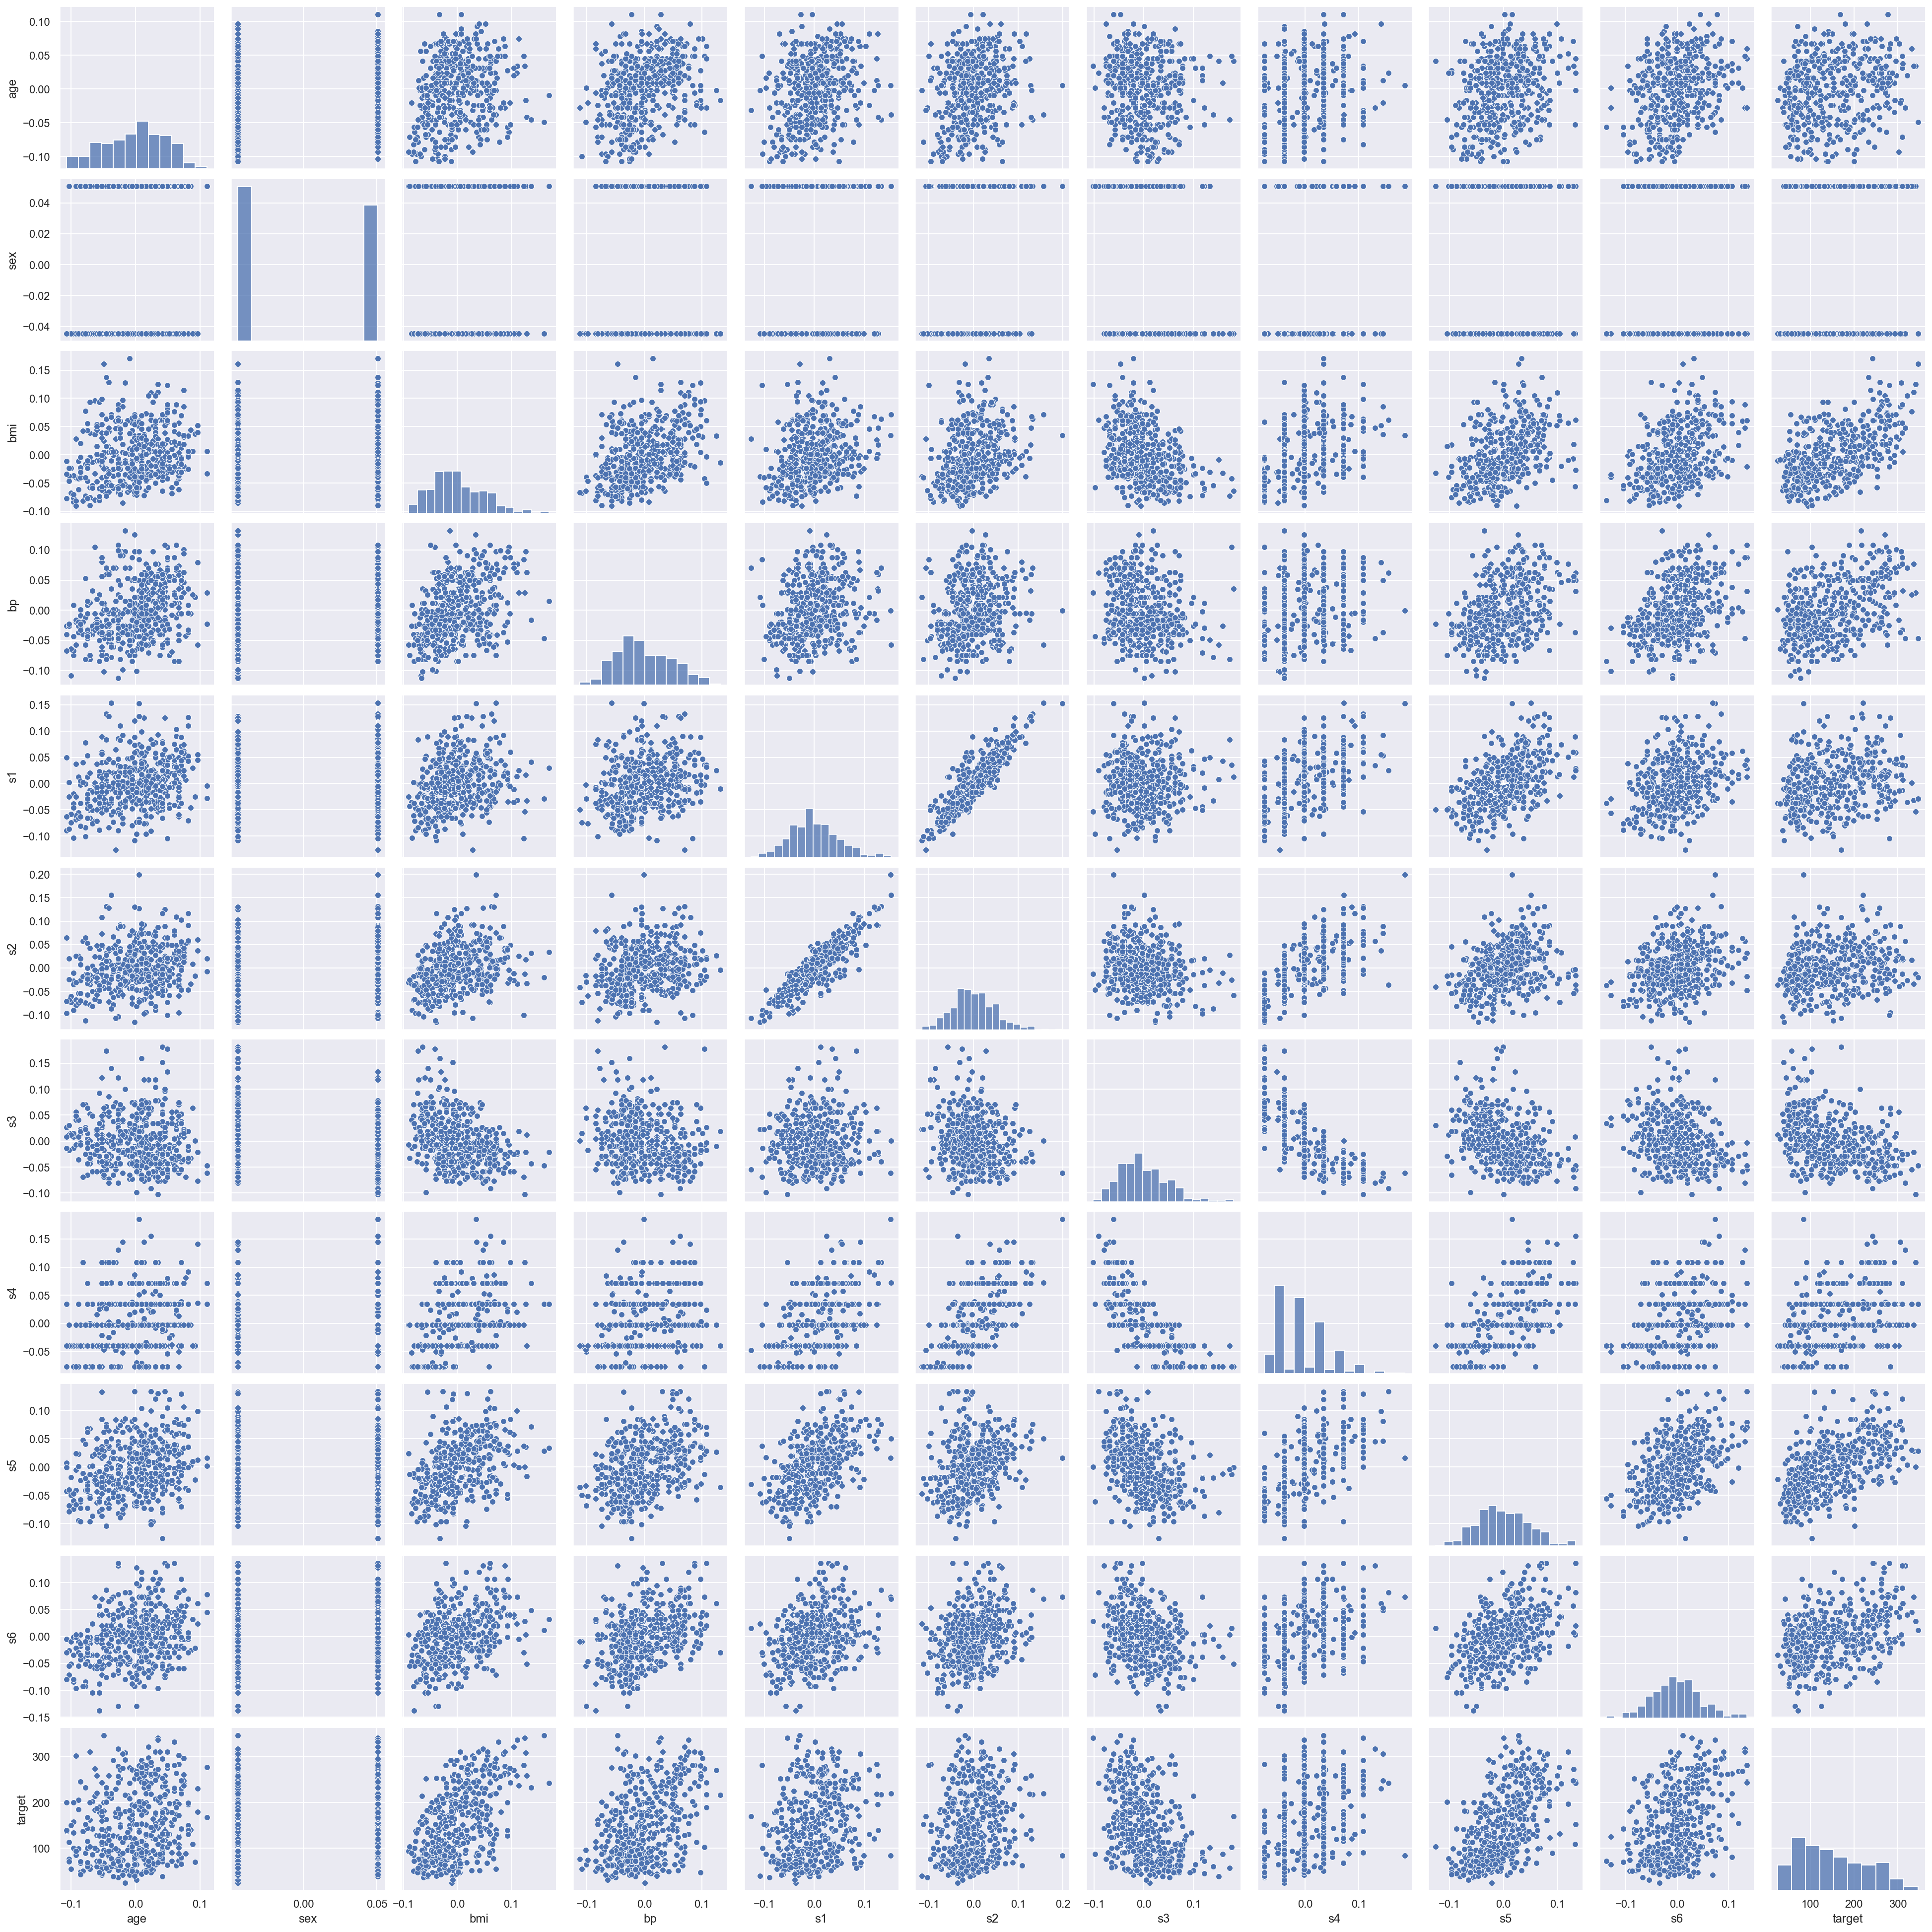

In [4]:
sns.pairplot(df);

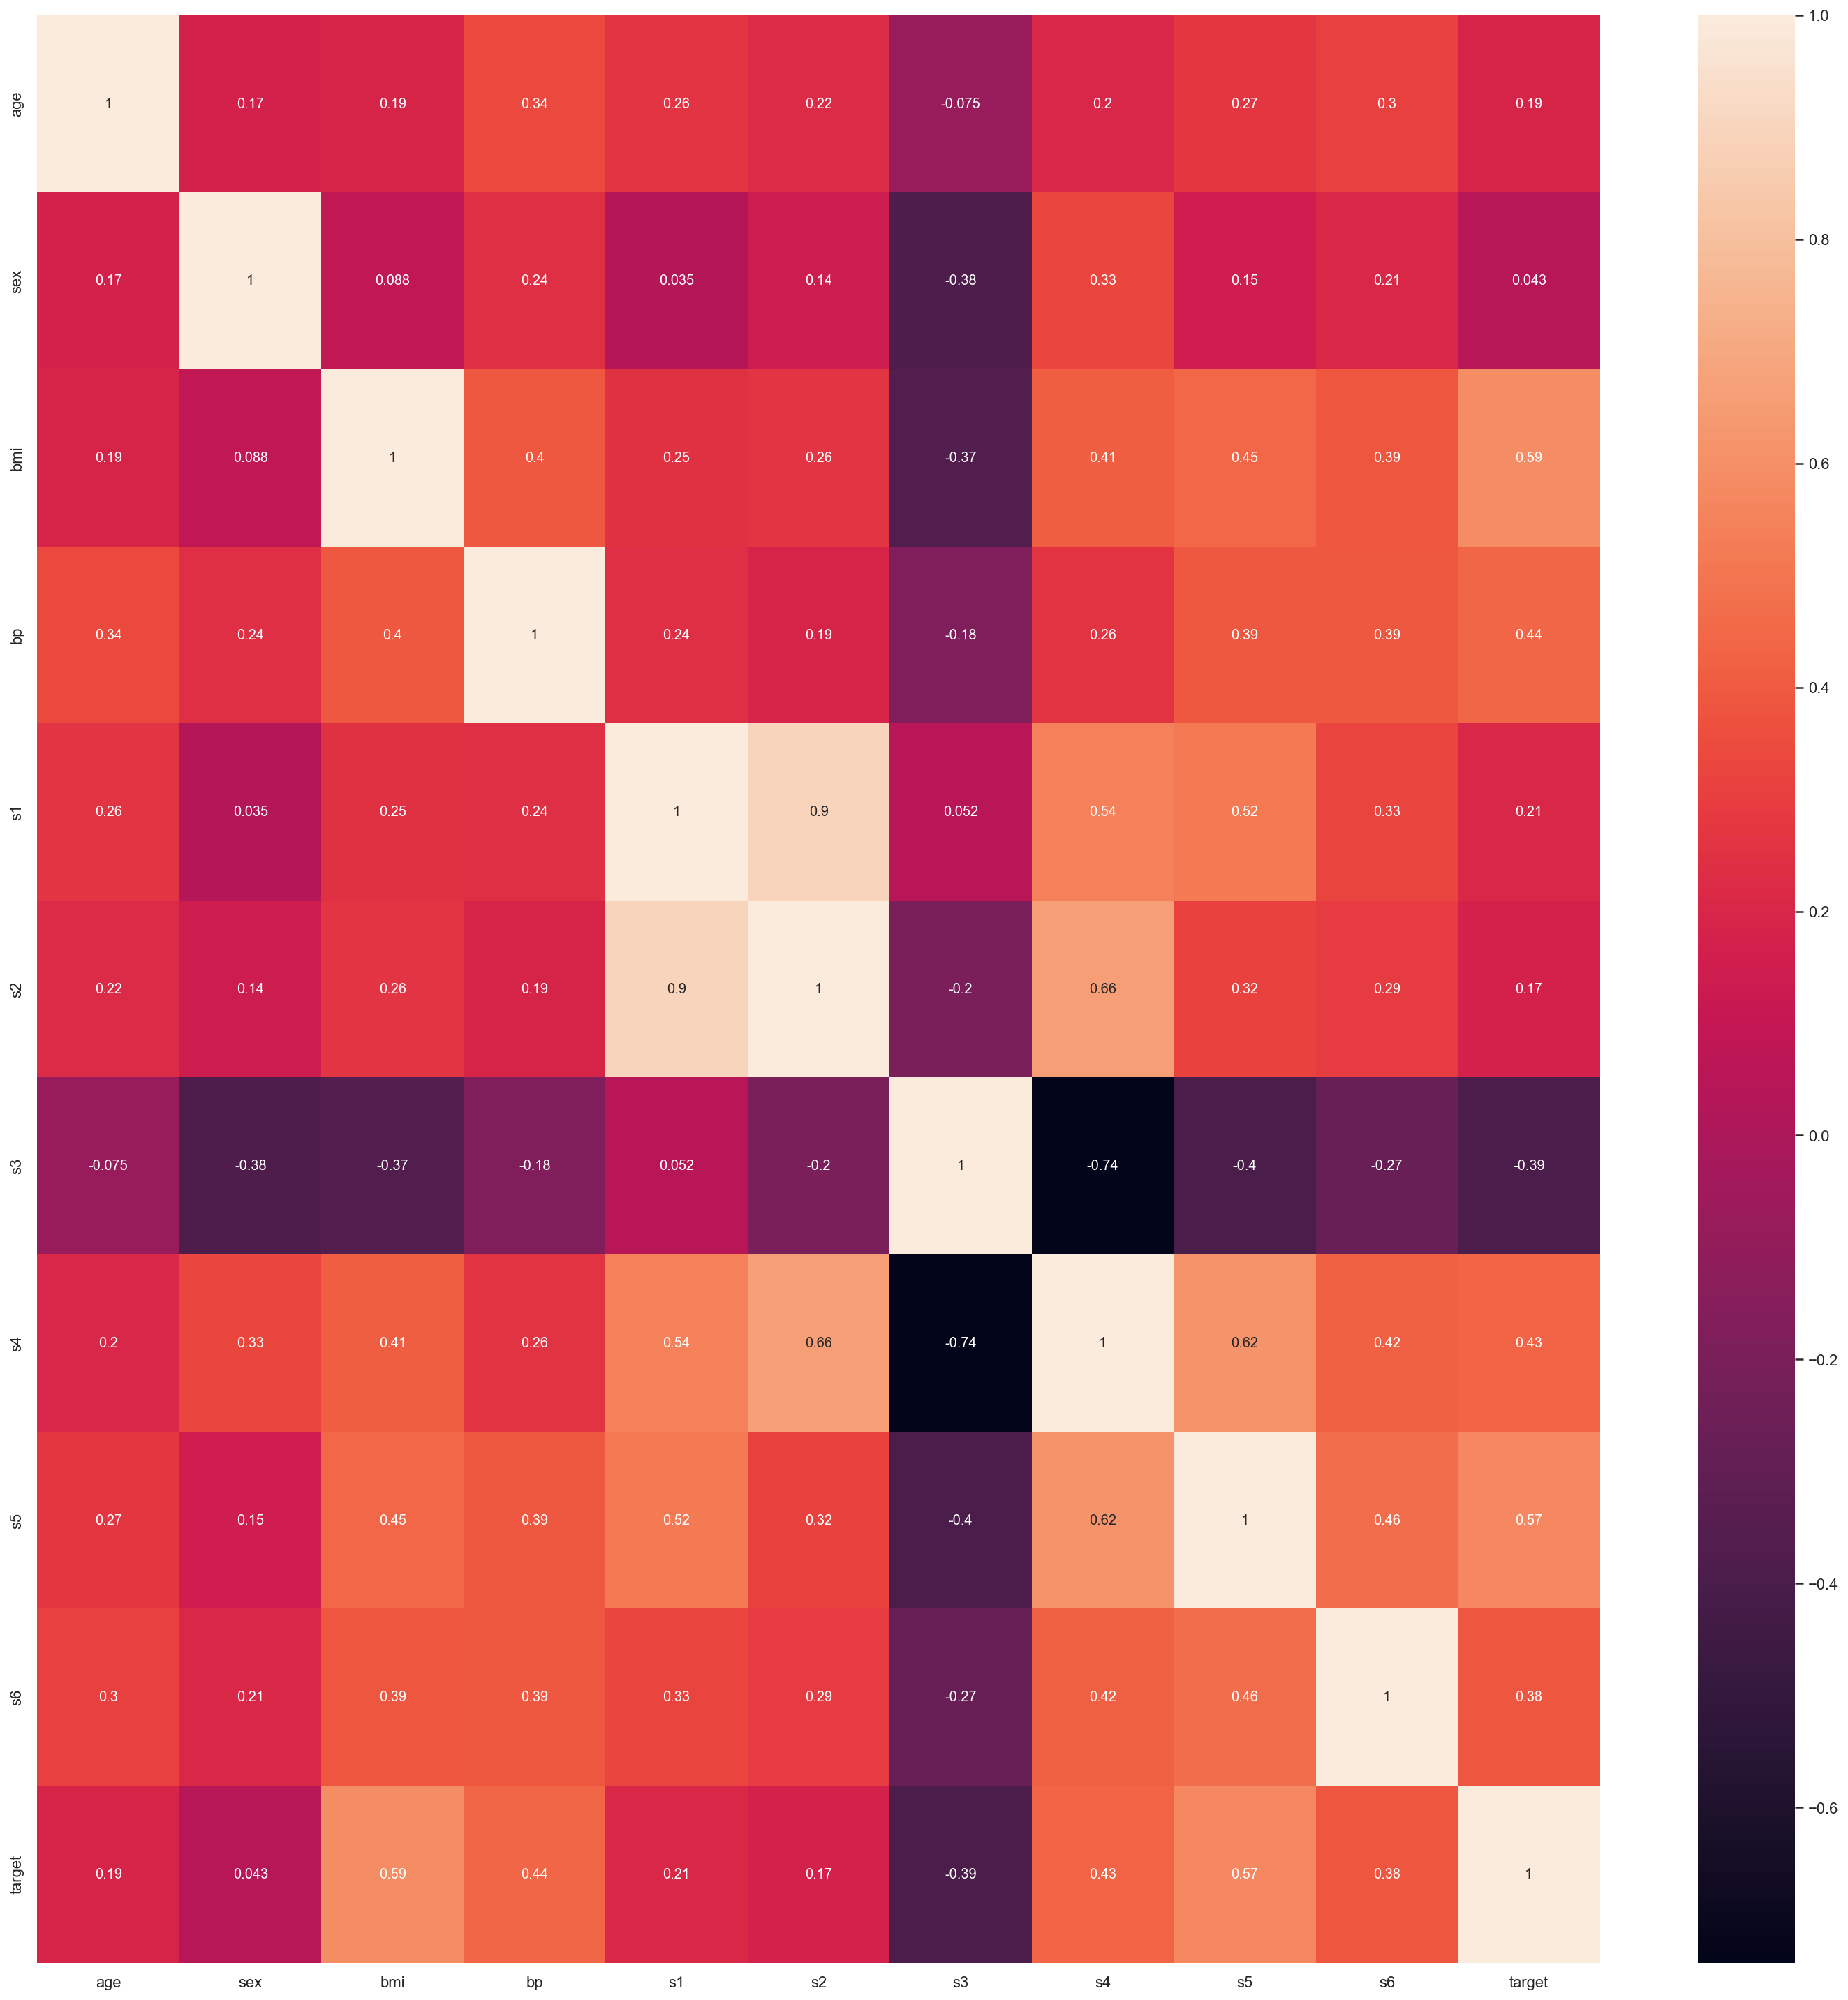

In [5]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout();

This plot shows the linear correlation between the variables within themselves & also variables with the target. This could be a phase where the variables which are multicollinear can be eliminated. Since this example will serve as an example of methodology followed in builiding a model.

## Data Preprocessing

Here we perform data preprocessing to prepare data to be digested by the machine learning algorithms.

### Train Test split

Let's operate train and test split on the diabetes dataset.

In [6]:
X = df.drop(['target'], axis=1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Feature Selection

With the help of plots, we can see that the dataset has a lot of features, some of them is better to be removed, some others to be combined.

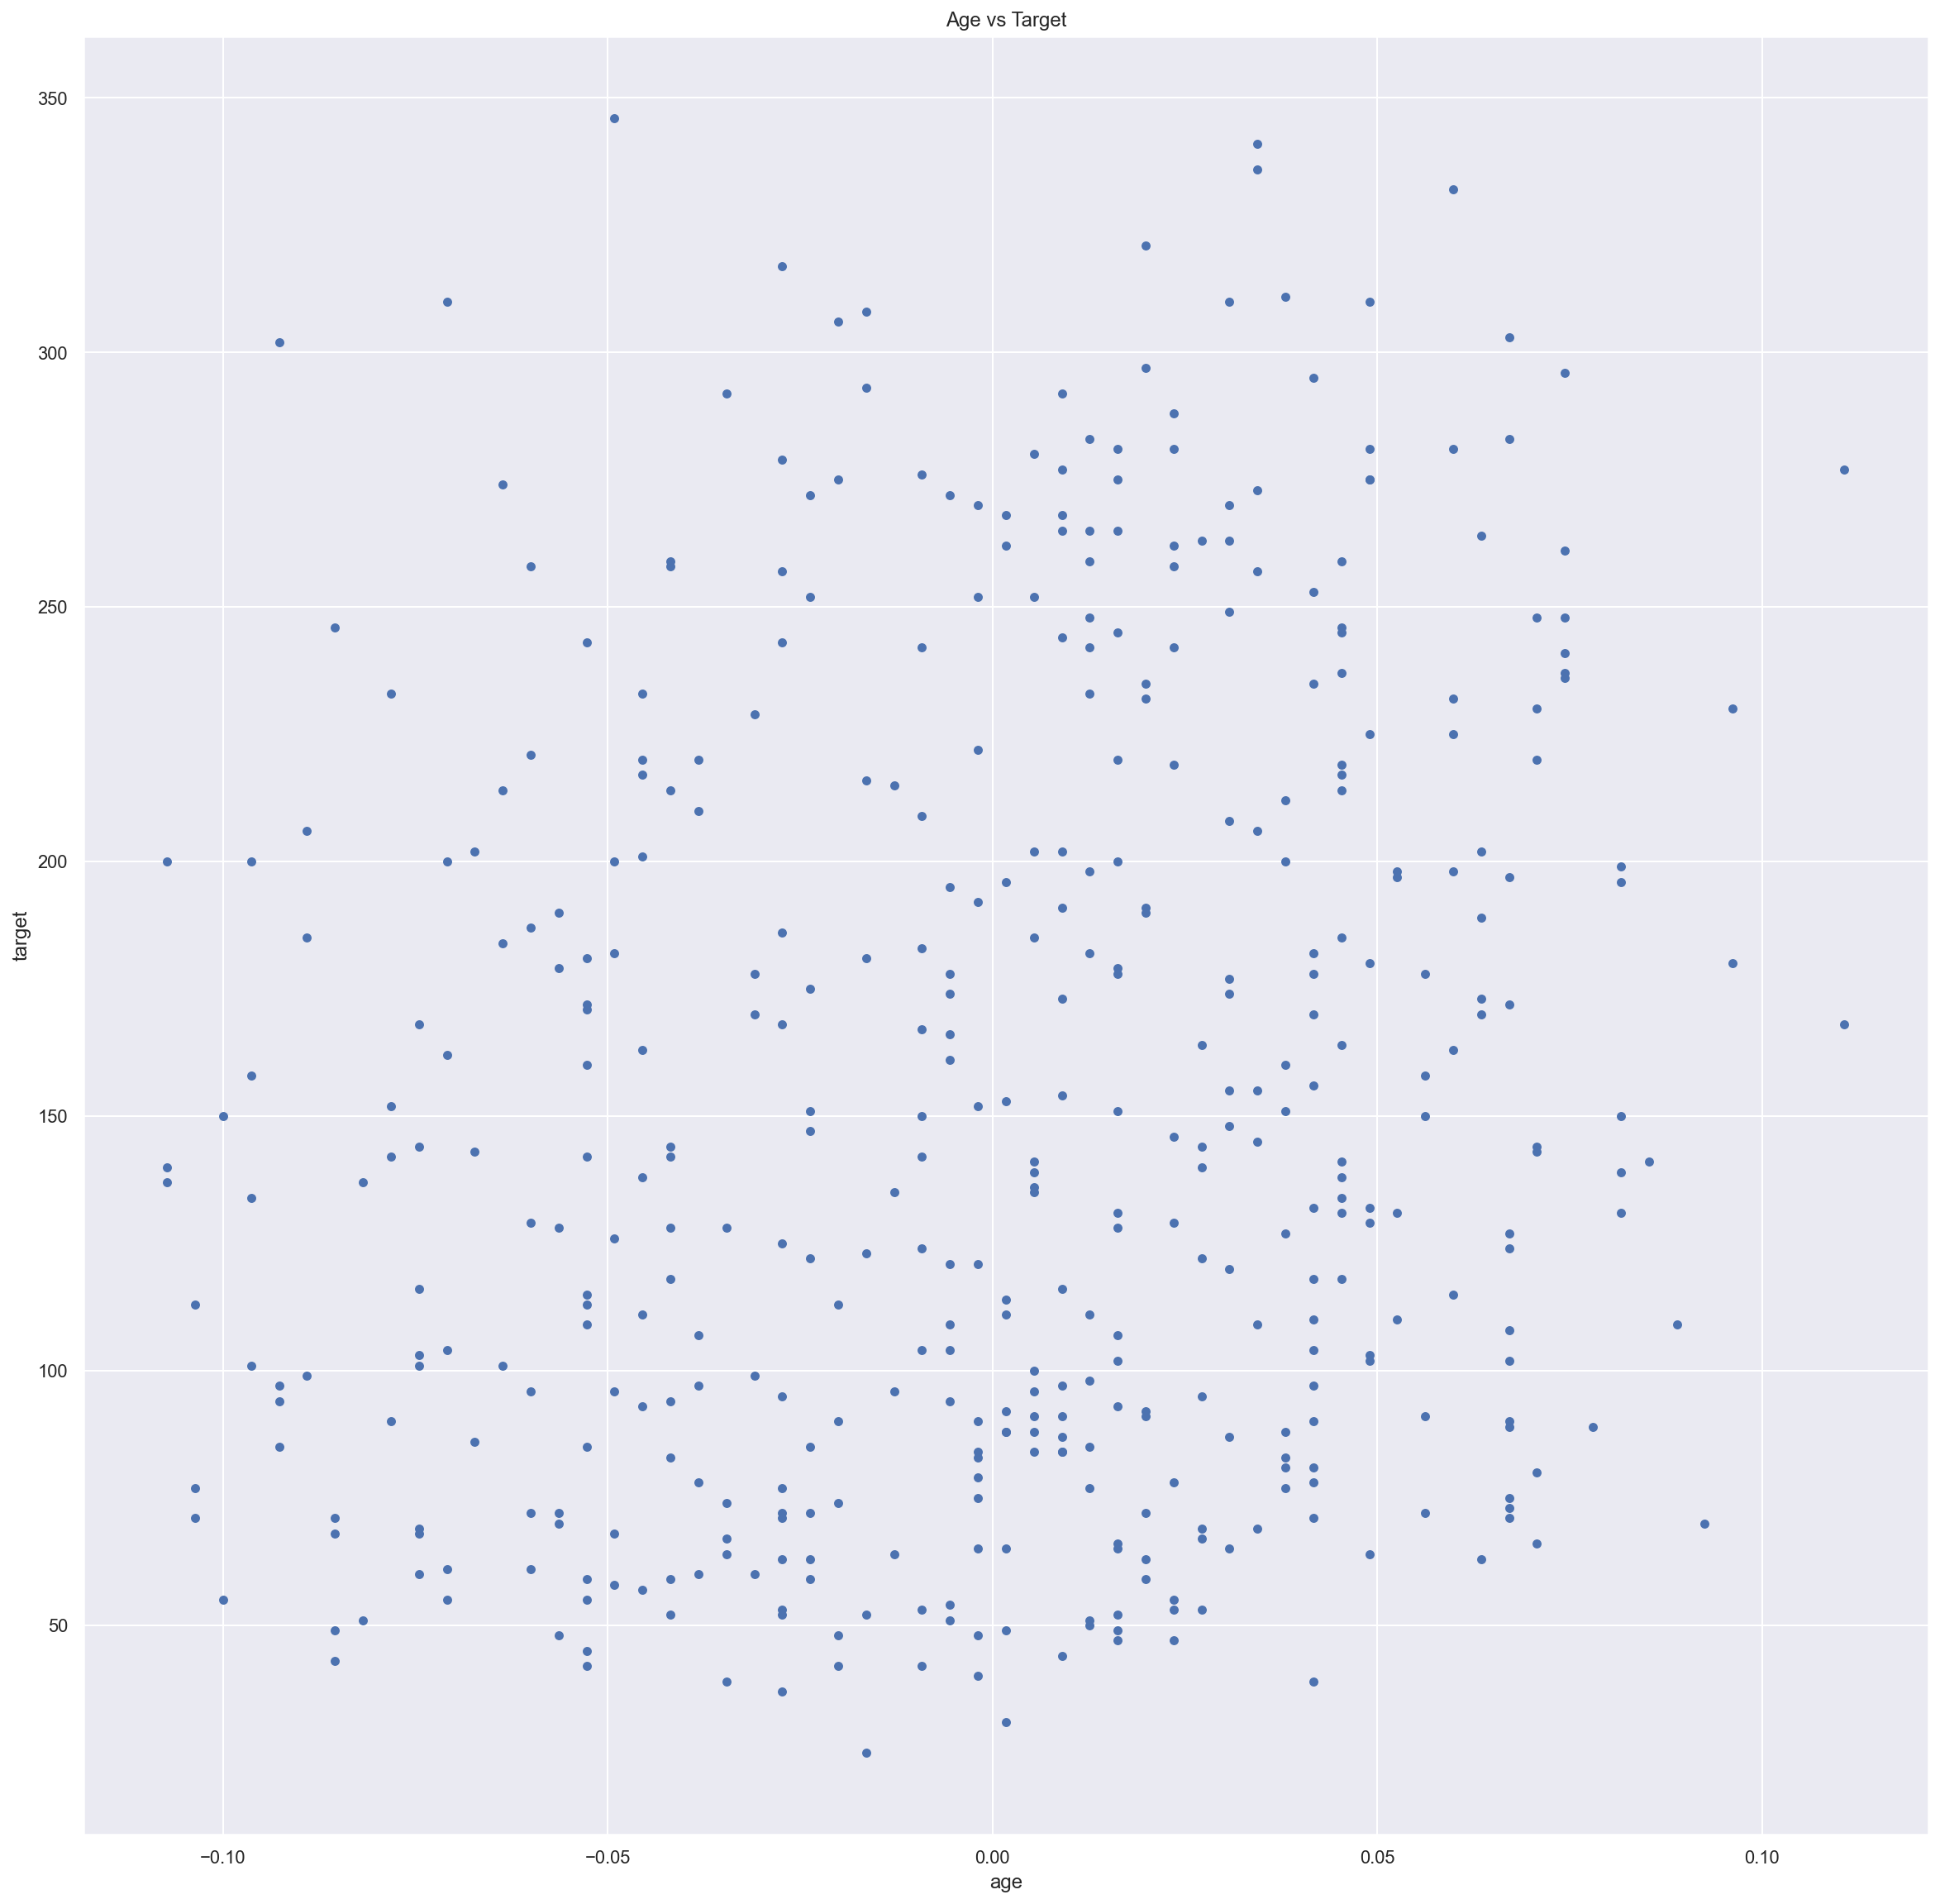

In [7]:
df.plot(x='age', y='target', kind='scatter', 
        c='b', title="Age vs Target", figsize=(20, 20));

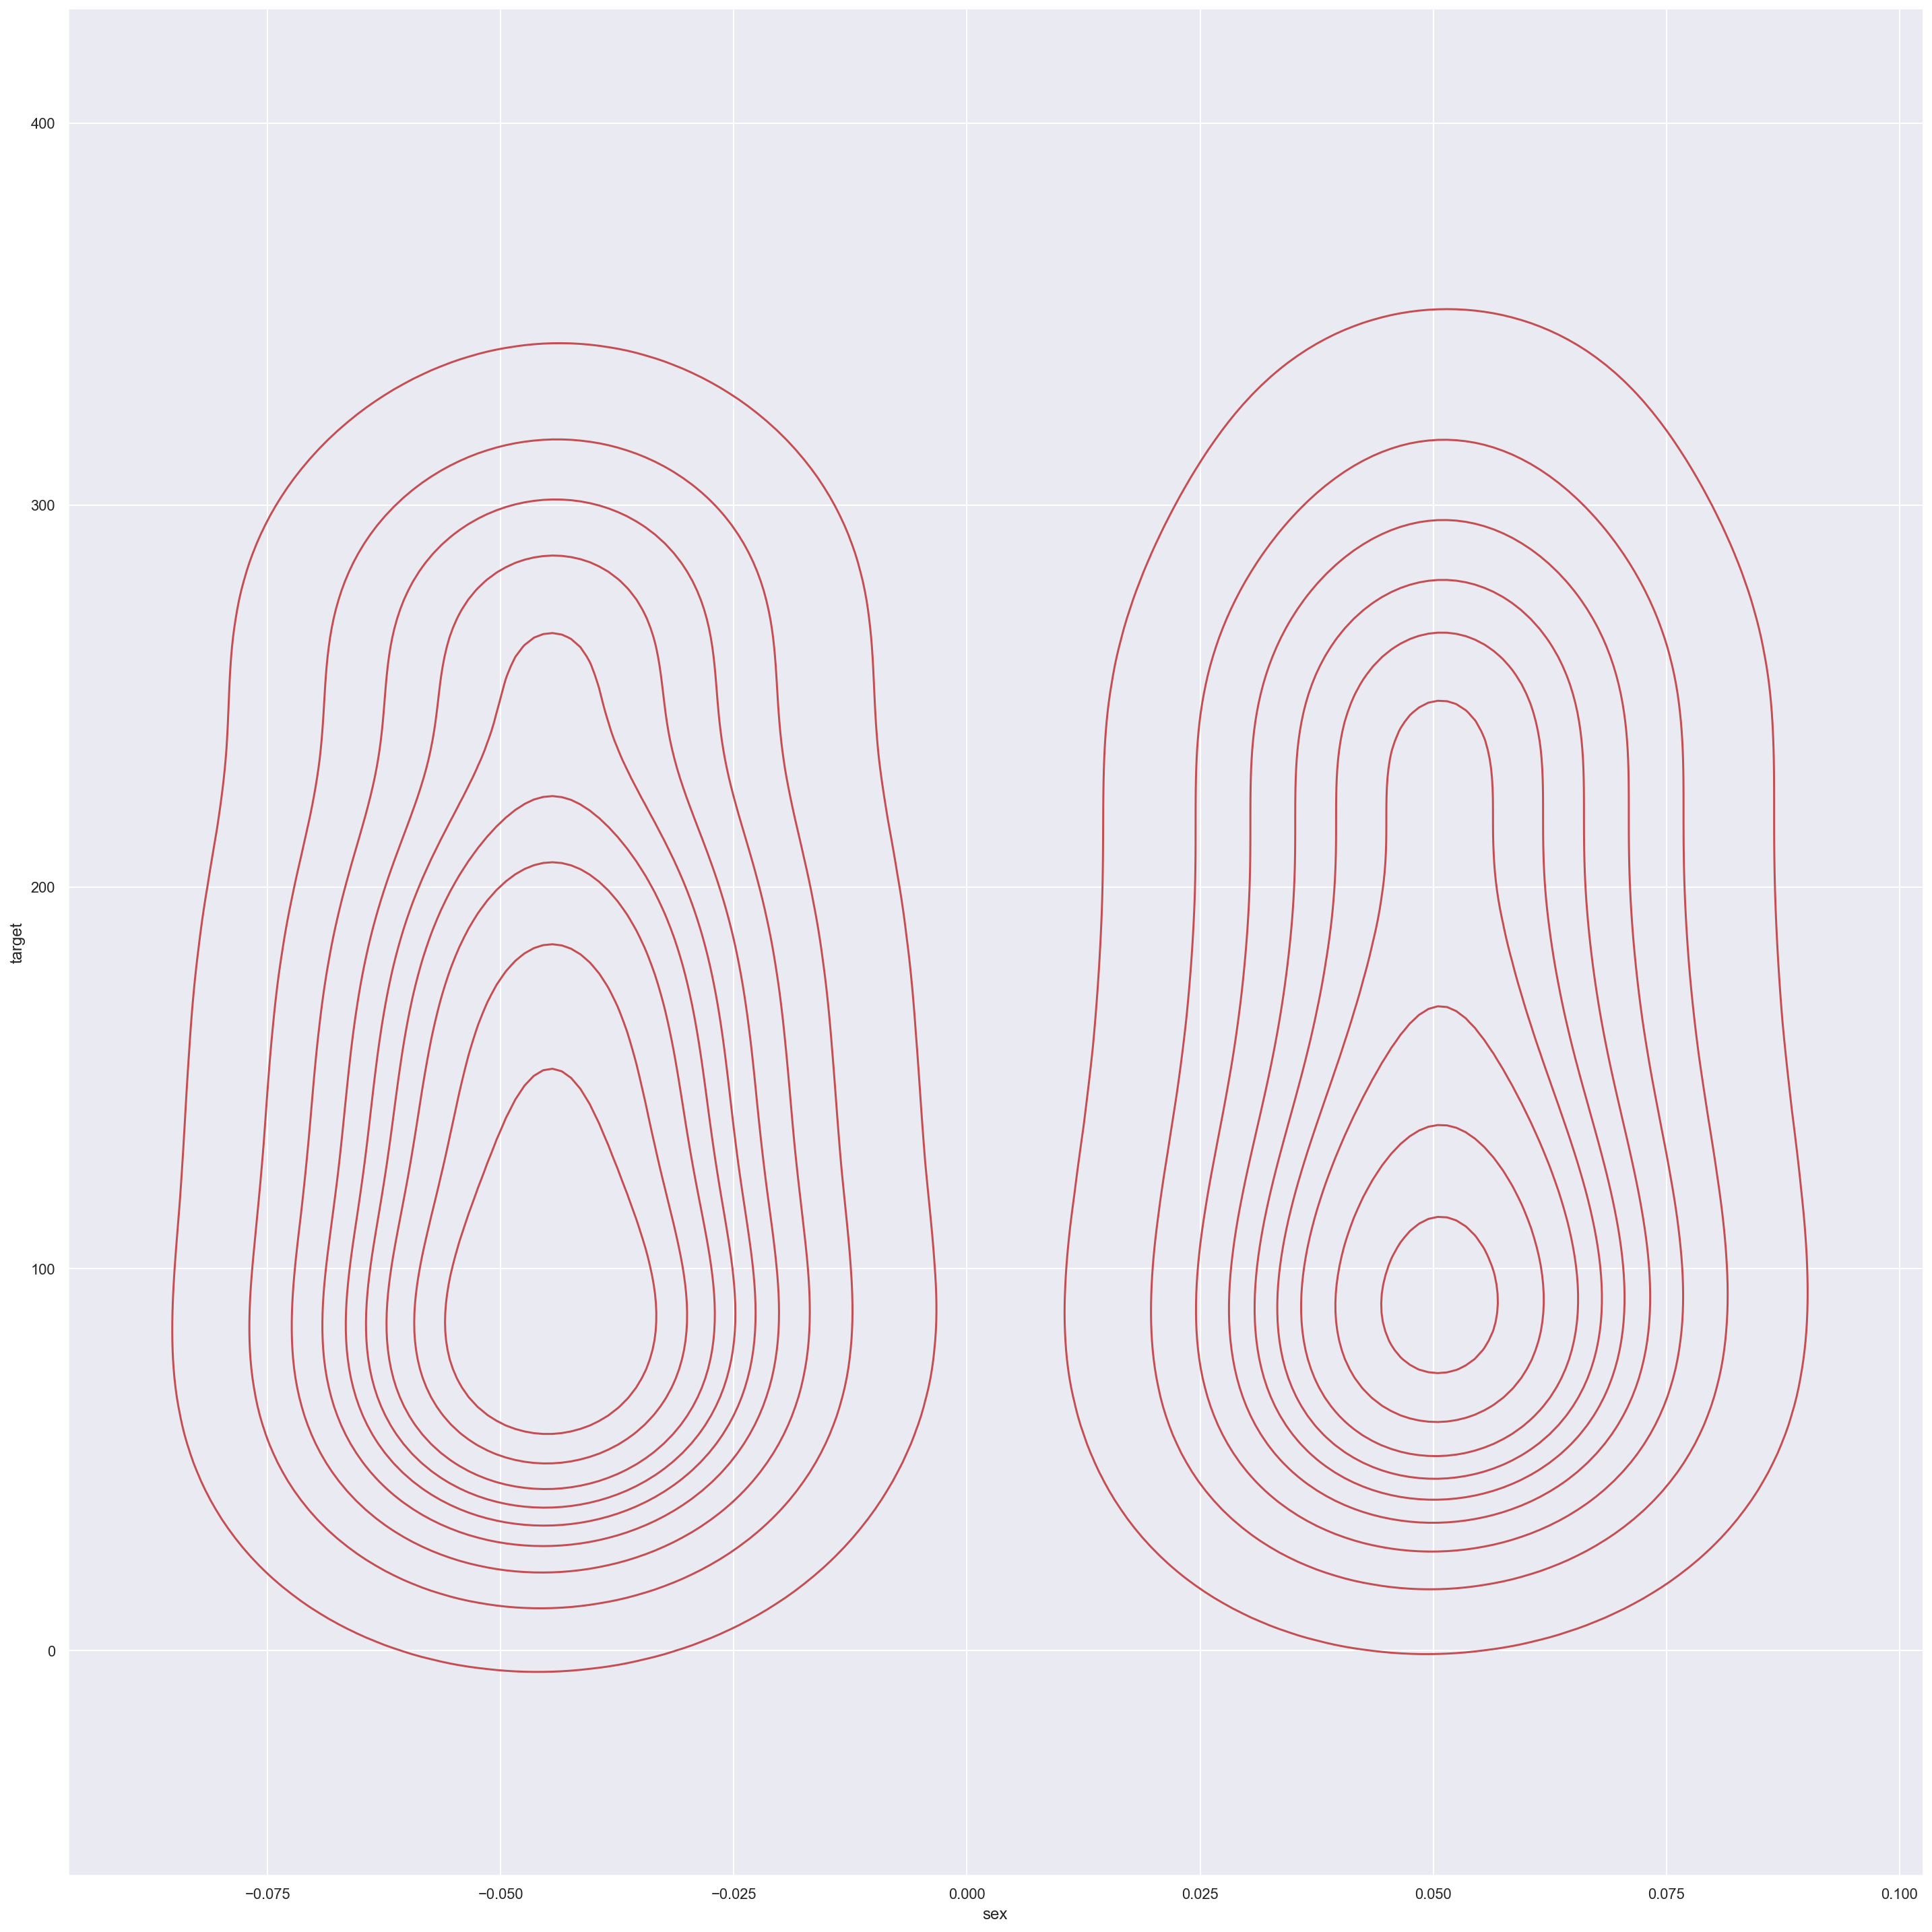

In [8]:
sns.displot(data=df, x="sex", y="target", kind="kde", color="r", height=20);

Quite the same distribution.

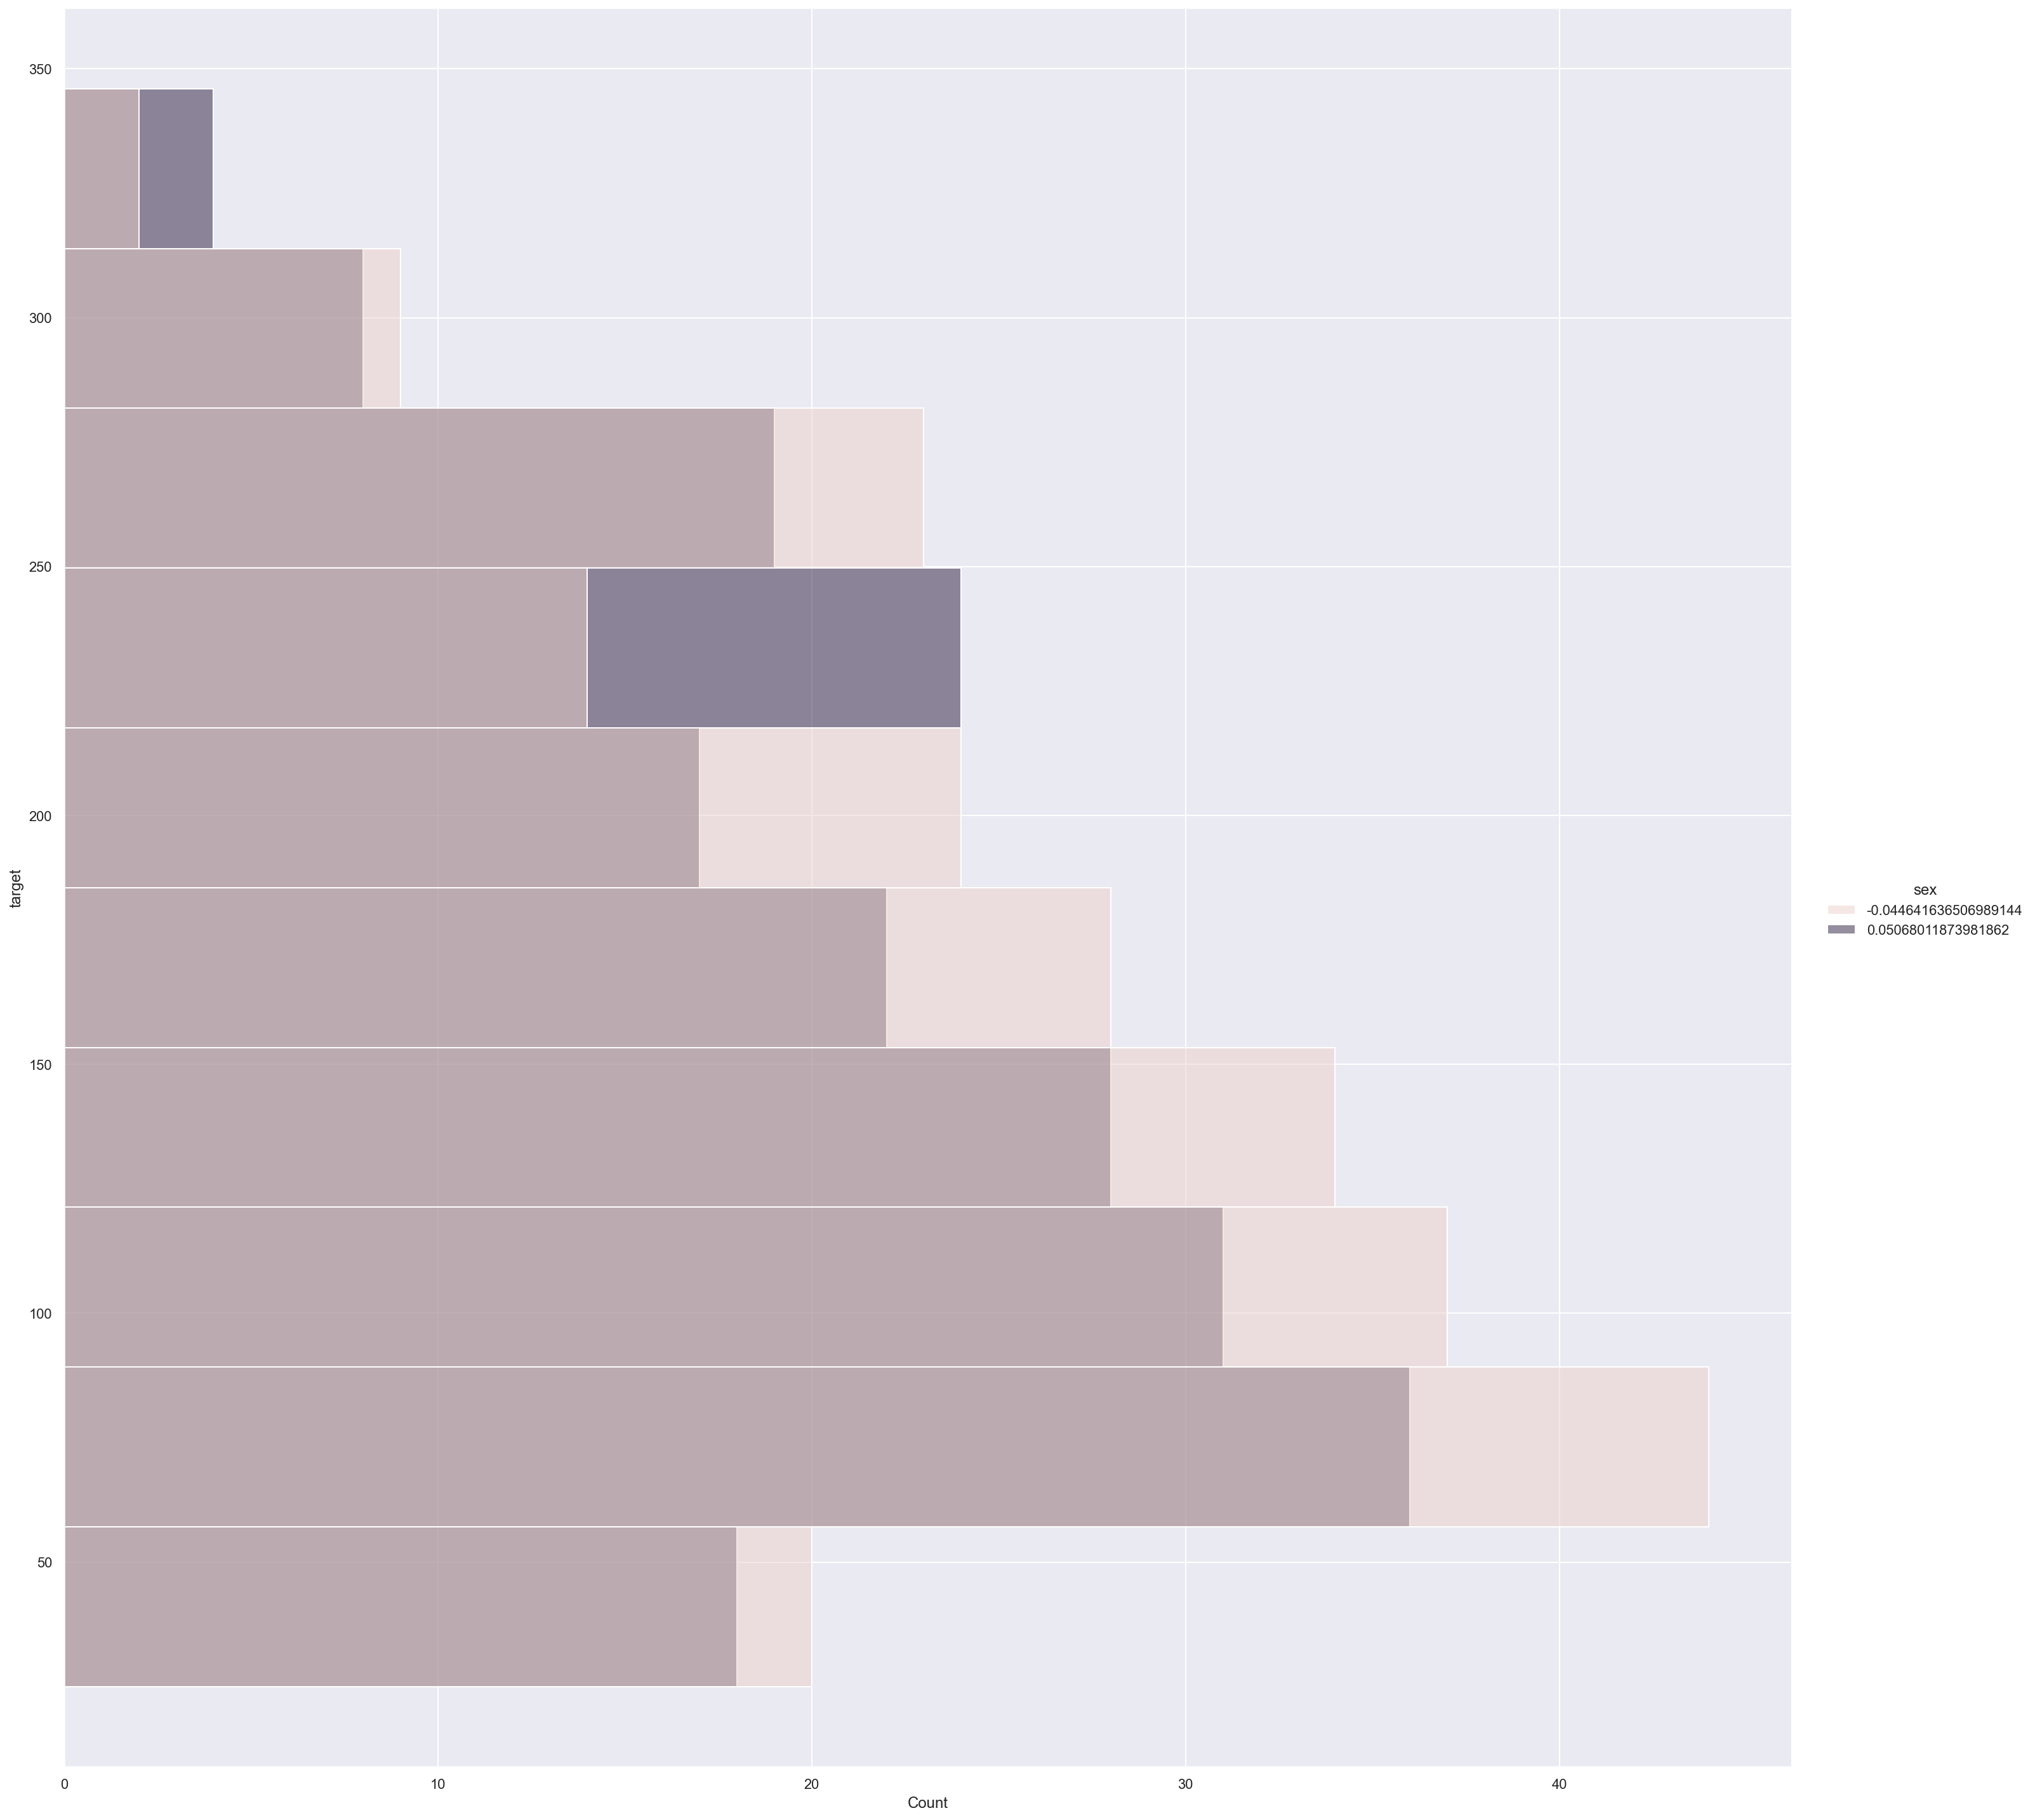

In [9]:
sns.displot(data=df, hue="sex", y="target", kind="hist", color="r", height=20);

Let's remove the features with a low correlation with the target and features highly correlated with each other.

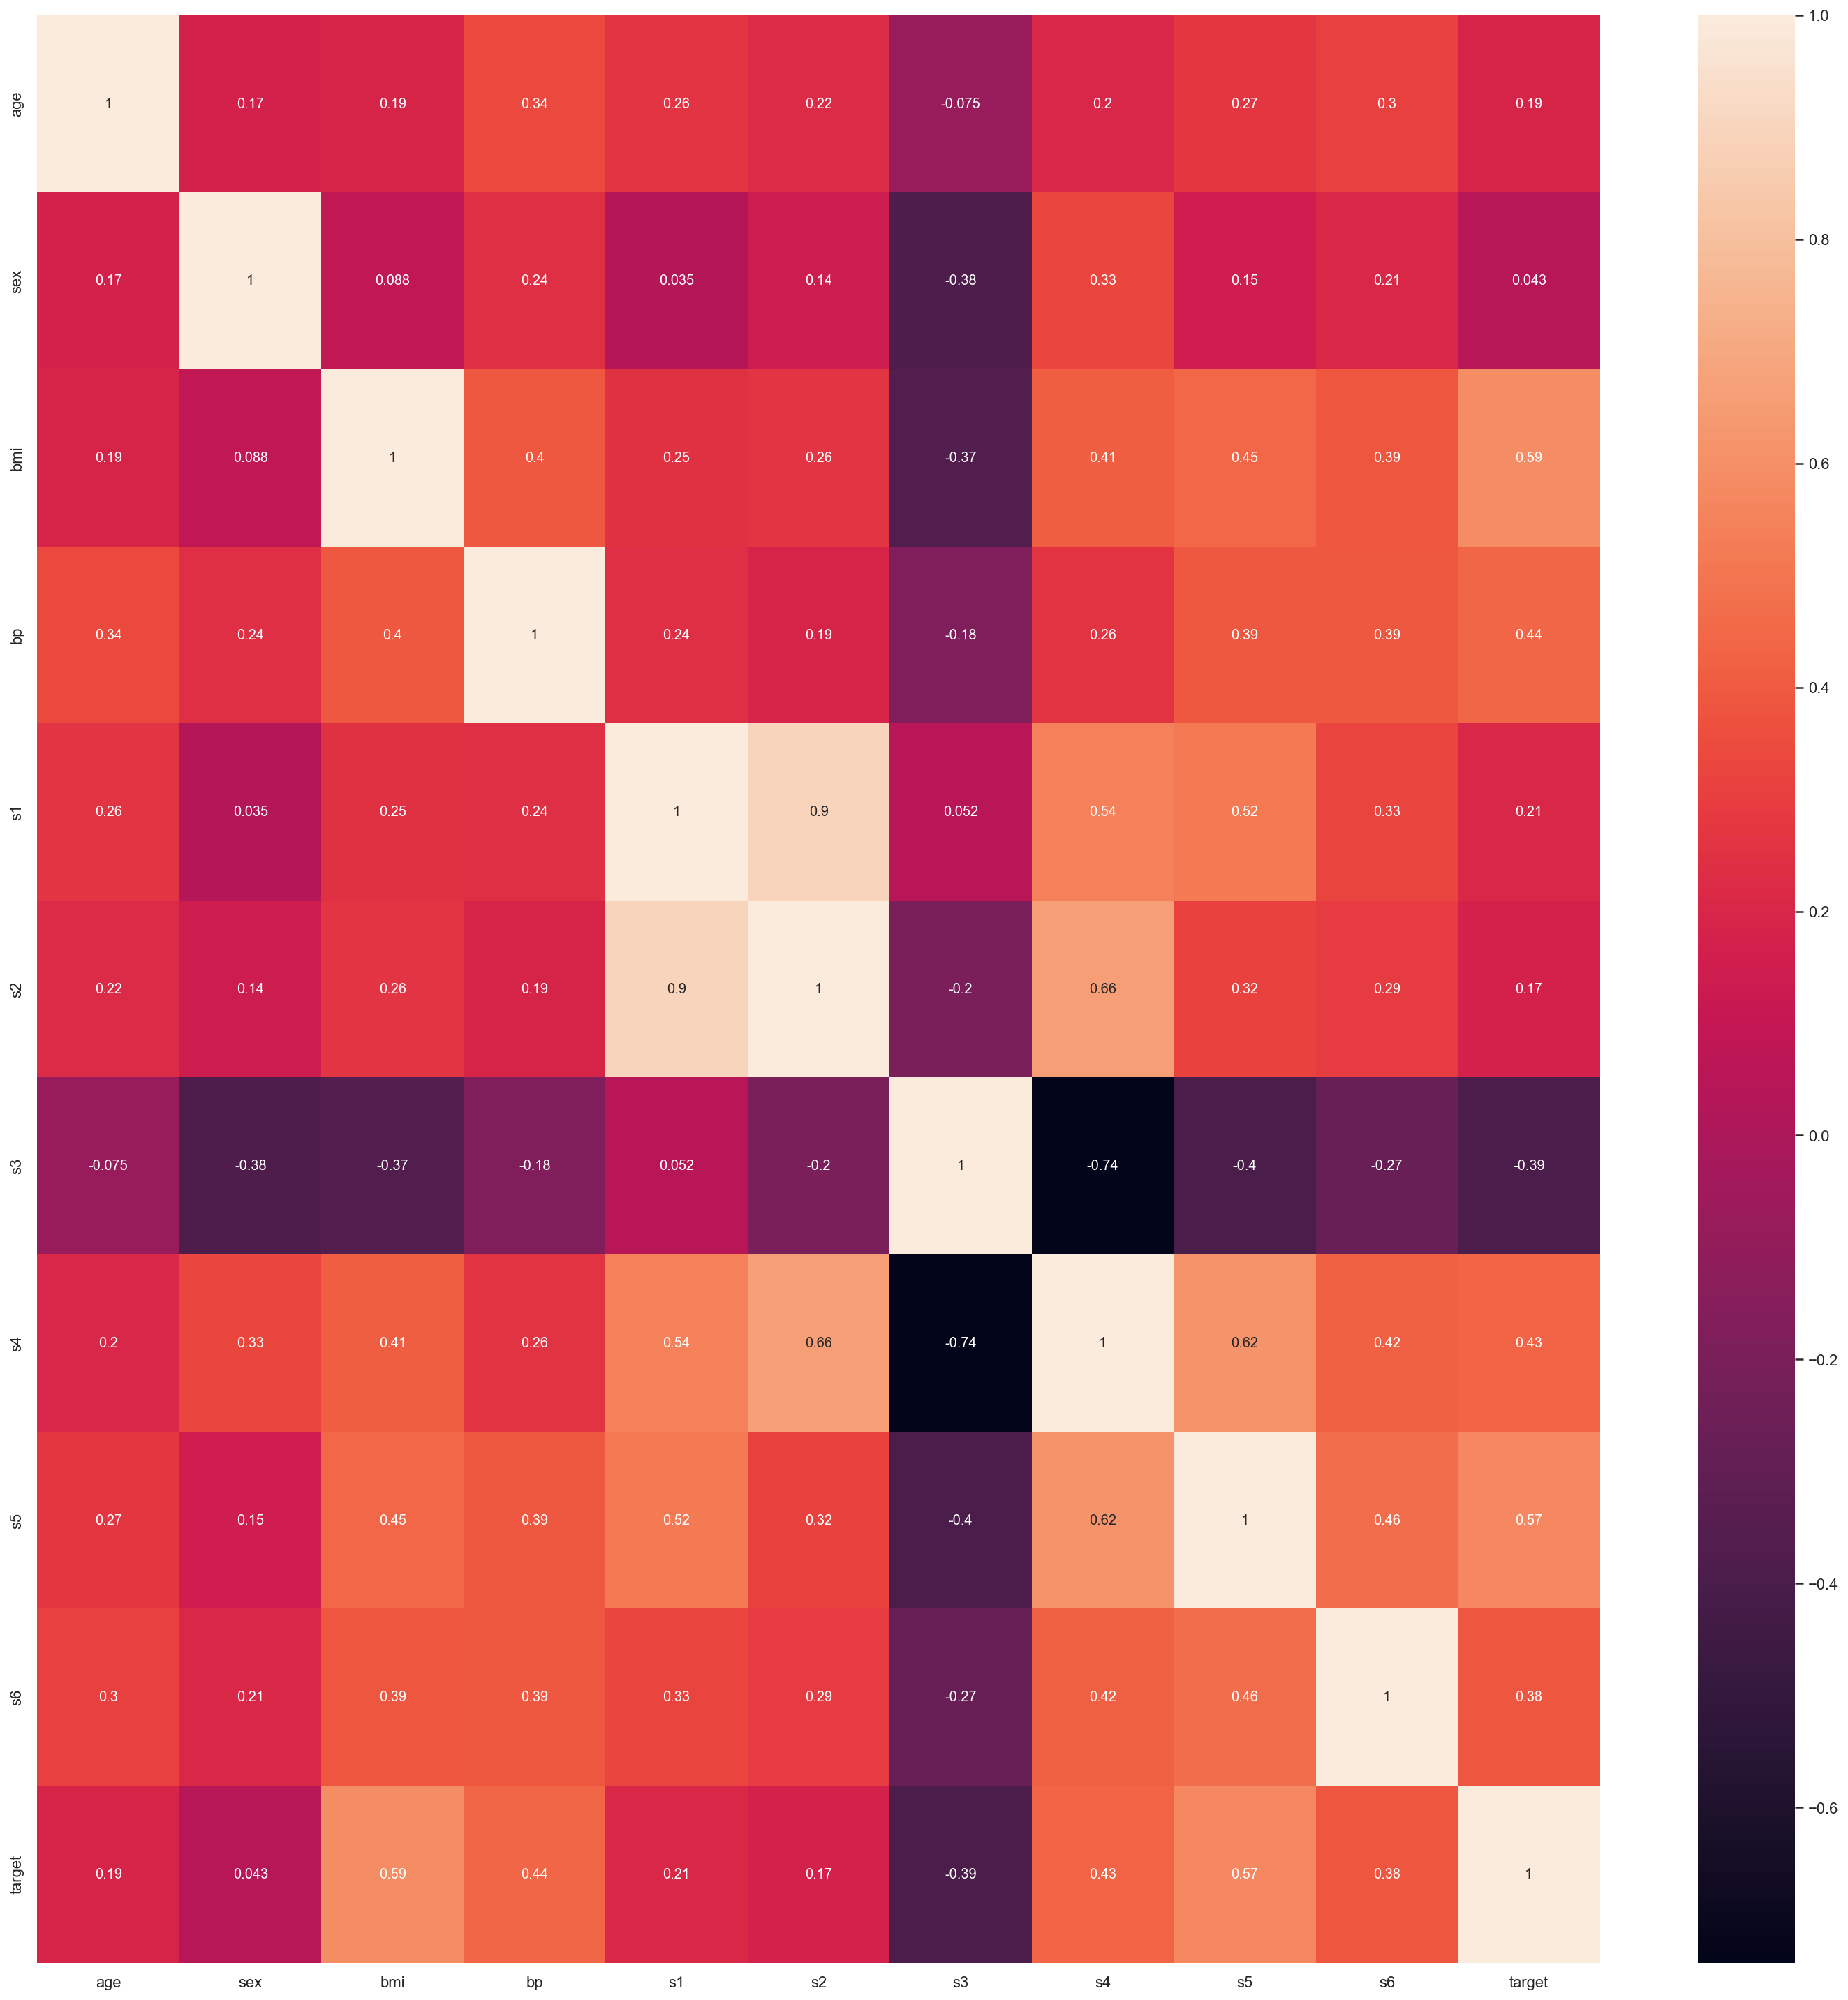

In [10]:
# Let's replot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout();

In [13]:
X_train = pd.DataFrame(X_train, columns=df.columns[:-1])
X_test = pd.DataFrame(X_test, columns=df.columns[:-1])

X_train_drop = X_train.drop(['age', 's2', 's3'], axis=1)
X_test_drop = X_test.drop(['age', 's2', 's3'], axis=1)

print(X_train_drop.shape)
print(X_test_drop.shape)

(375, 7)
(67, 7)


## Modelling

First, we will create instance of a model to be used as a baseline.

Then, we will perform a grid search to find the best parameters for the model.

Finally, we will evaluate the model using the test set.

In [14]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict on the test set
y_pred = lr.predict(X_test)

In [16]:
print(f"1) The model explains {np.round(explained_variance_score(y_test,y_pred)*100,2)}% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mean_absolute_error(y_test,y_pred ),2))
print("3) The R-Square score of the model is " , np.round(r2_score(y_test,y_pred),2))

1) The model explains 41.73% variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 44.54
3) The R-Square score of the model is  0.41


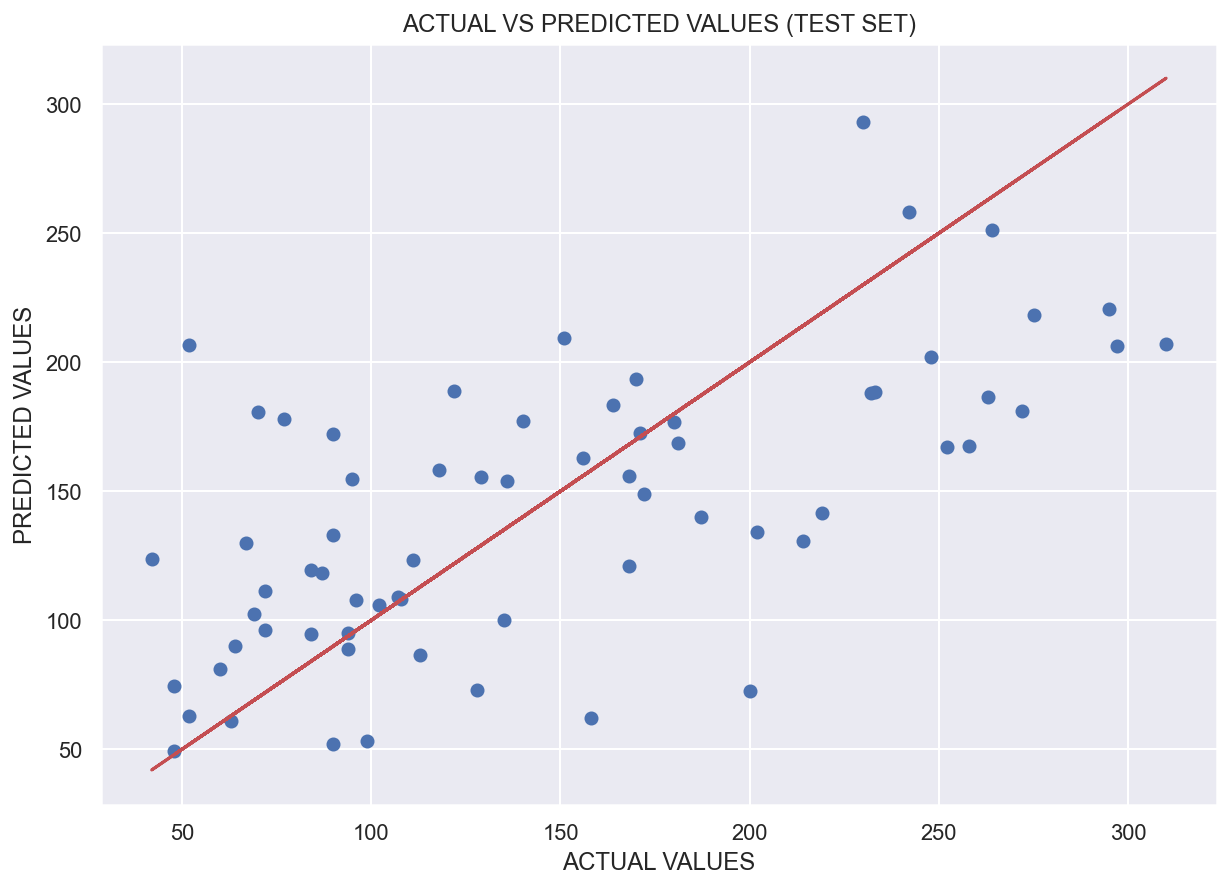

In [17]:
#image dimensions
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES');

As can be seen from the graph above, there is no clear tendency for the spots to be distributed around a line, confirming the fact that linear regression is not a good model.

Anyway, we also want to show a graph of the Kernel Density Estimation, which helps us visualize the probability density of a random variable, between real values ​​and those predicted by the linear mode.

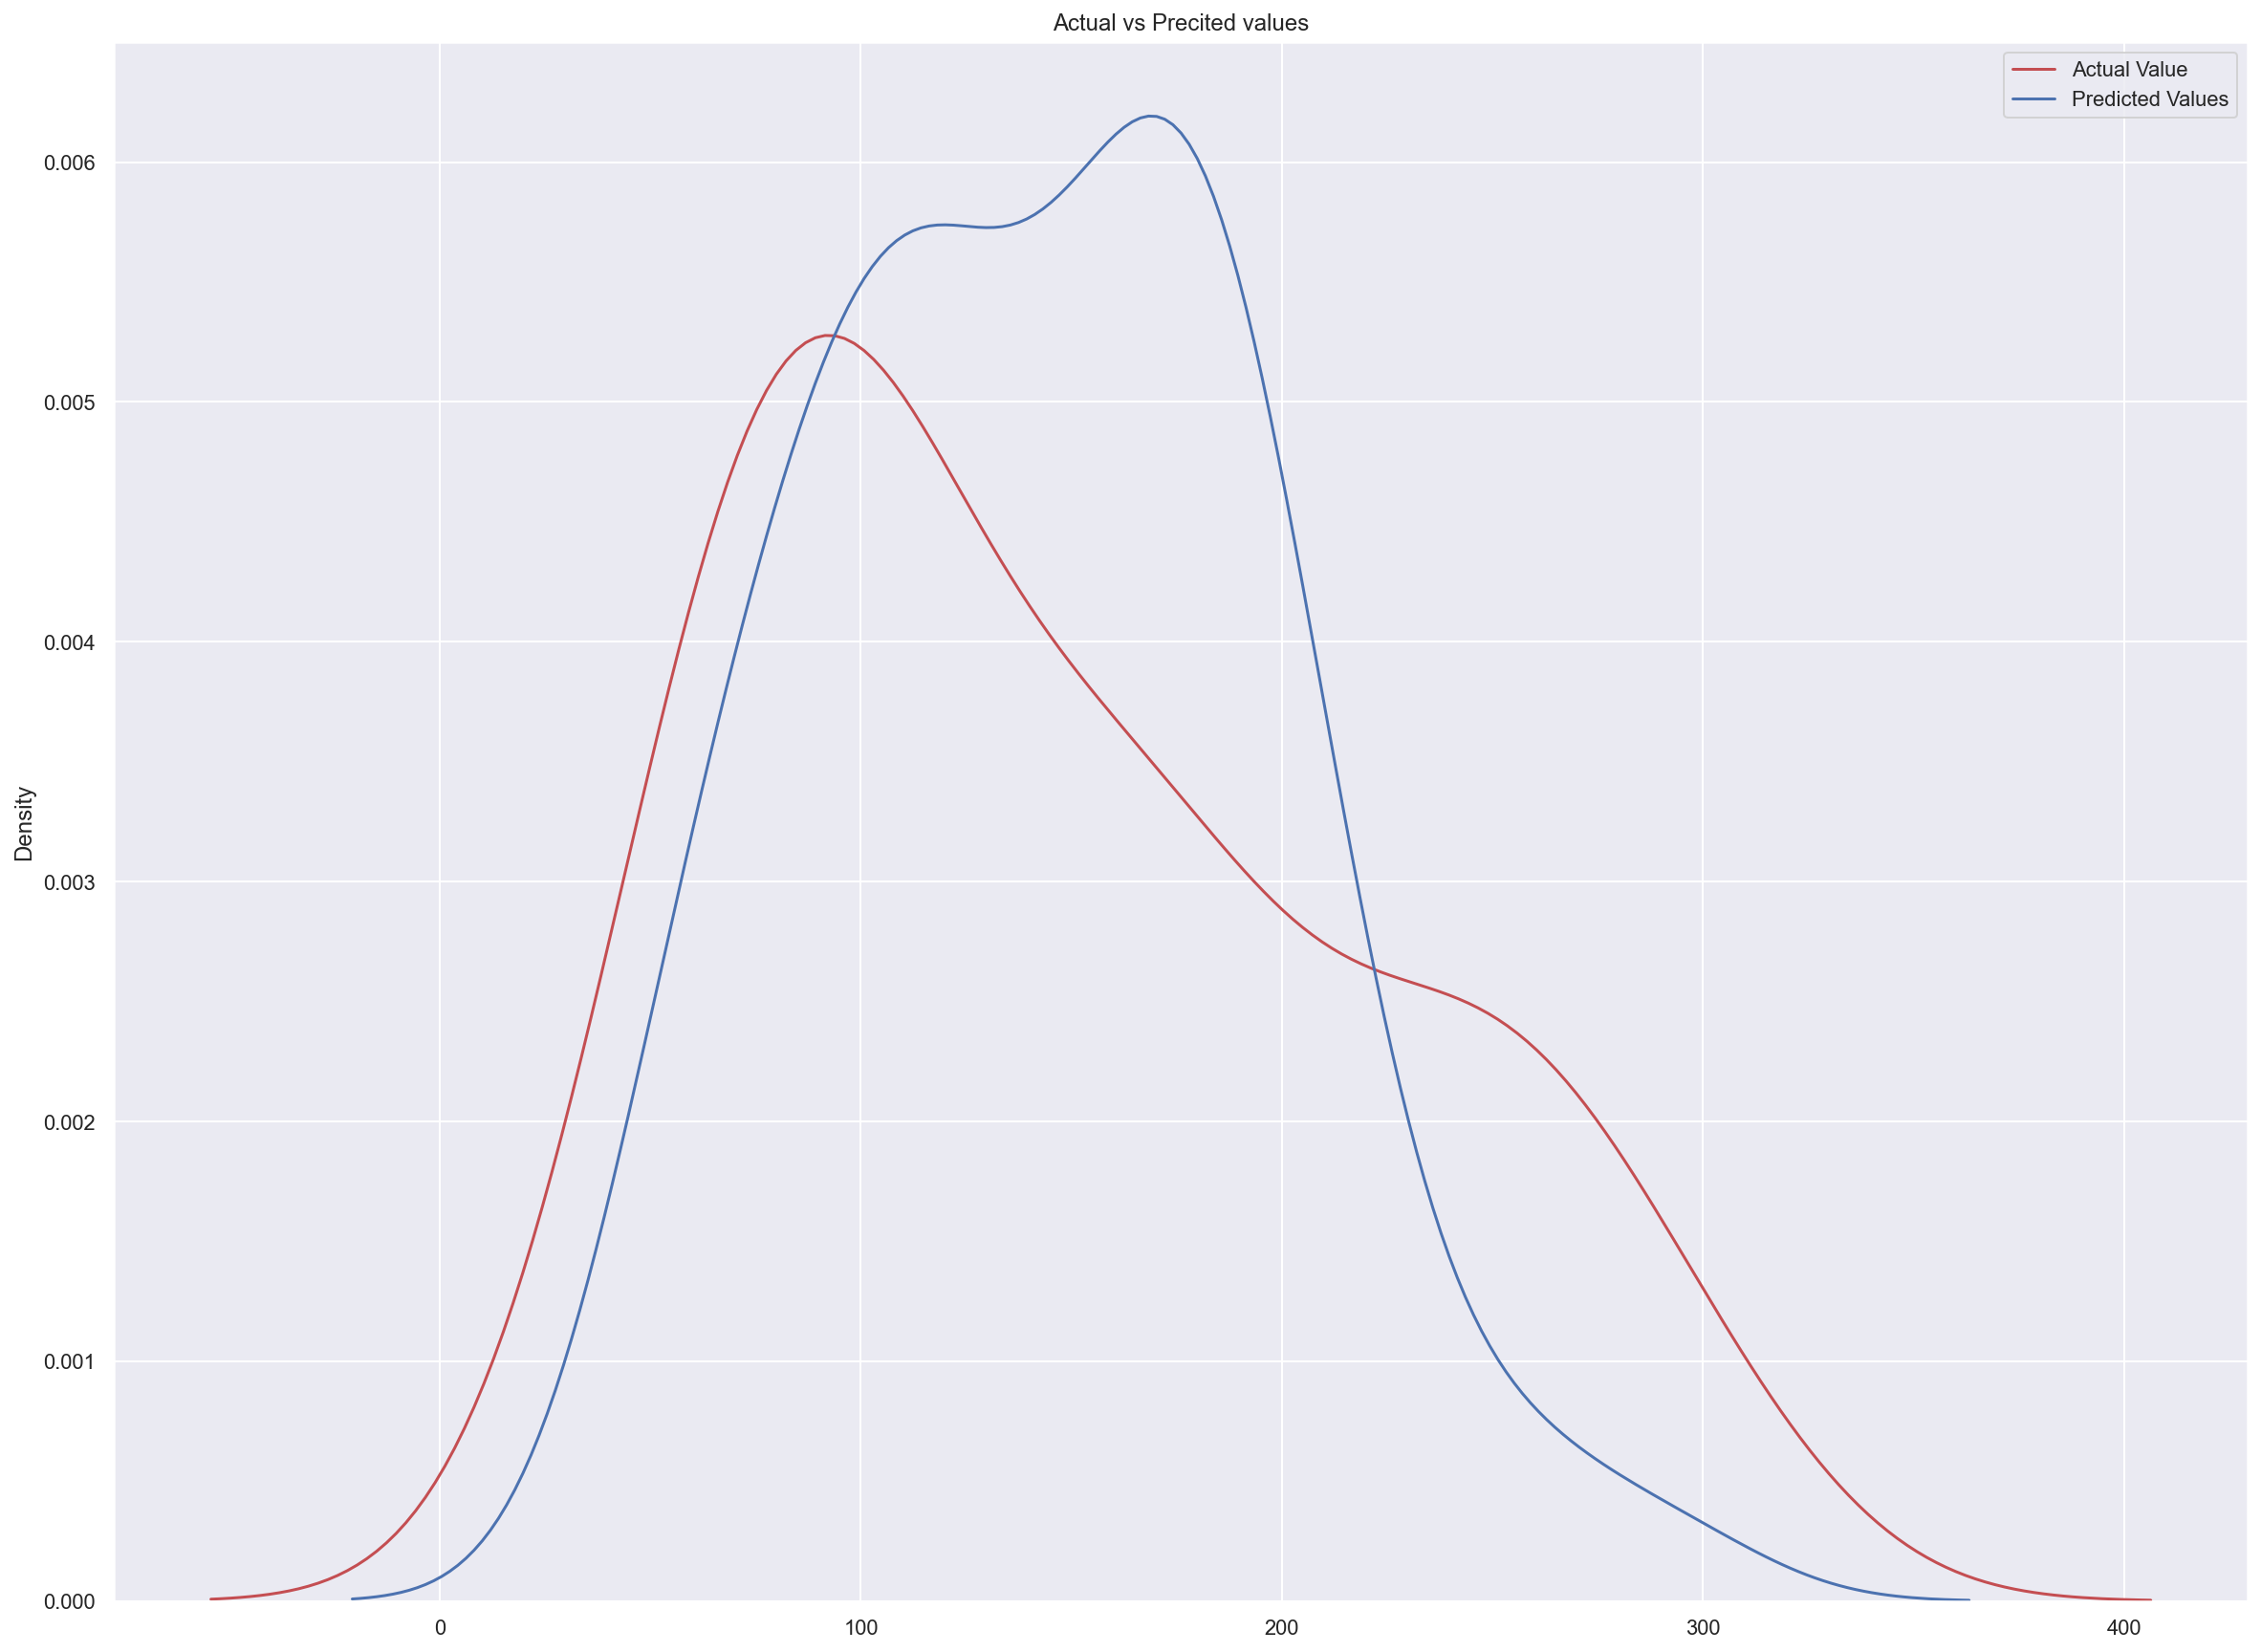

In [18]:
#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_pred, color="b", label="Predicted Values", ax=ax) #predicted values
#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend();

### Decision Tree model

Let's try with a different model.

In [19]:
# Decision tree regressor
dt = DecisionTreeRegressor(max_depth=3, 
                            random_state=42, 
                            min_samples_leaf=5, 
                            min_samples_split=5,
                            criterion="absolute_error",
                            max_features="auto")
dt.fit(X_train, y_train)

/Users/oscardefelice/miniconda3/envs/lectures/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      max_features='auto', min_samples_leaf=5,
                      min_samples_split=5, random_state=42)

In [20]:
# Predict on the test set
y_pred = dt.predict(X_test)

In [21]:
print(f"1) The model explains {np.round(explained_variance_score(y_test,y_pred)*100,2)}% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mean_absolute_error(y_test,y_pred ),2))
print("3) The R-Square score of the model is " , np.round(r2_score(y_test,y_pred),2))

1) The model explains 39.55% variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 45.85
3) The R-Square score of the model is  0.39


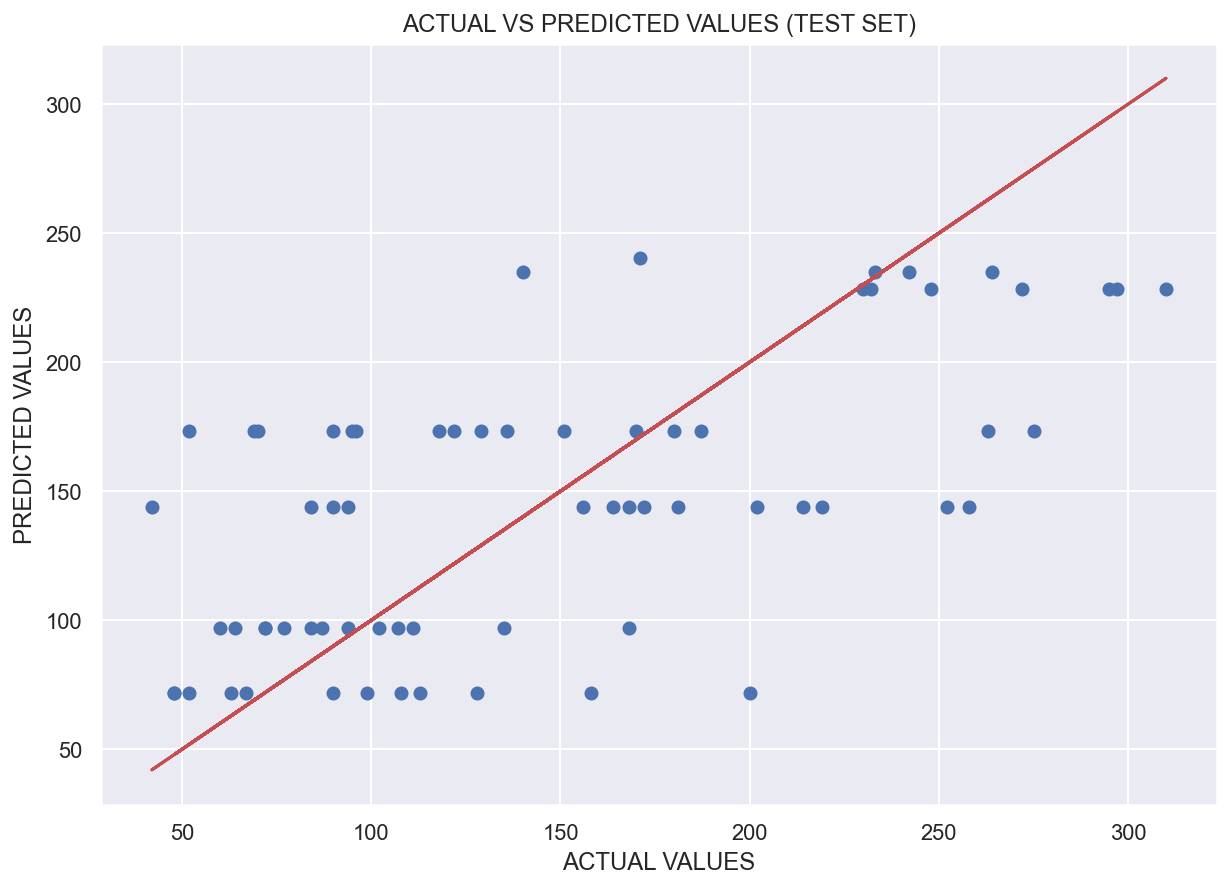

In [22]:
#image dimensions
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES');

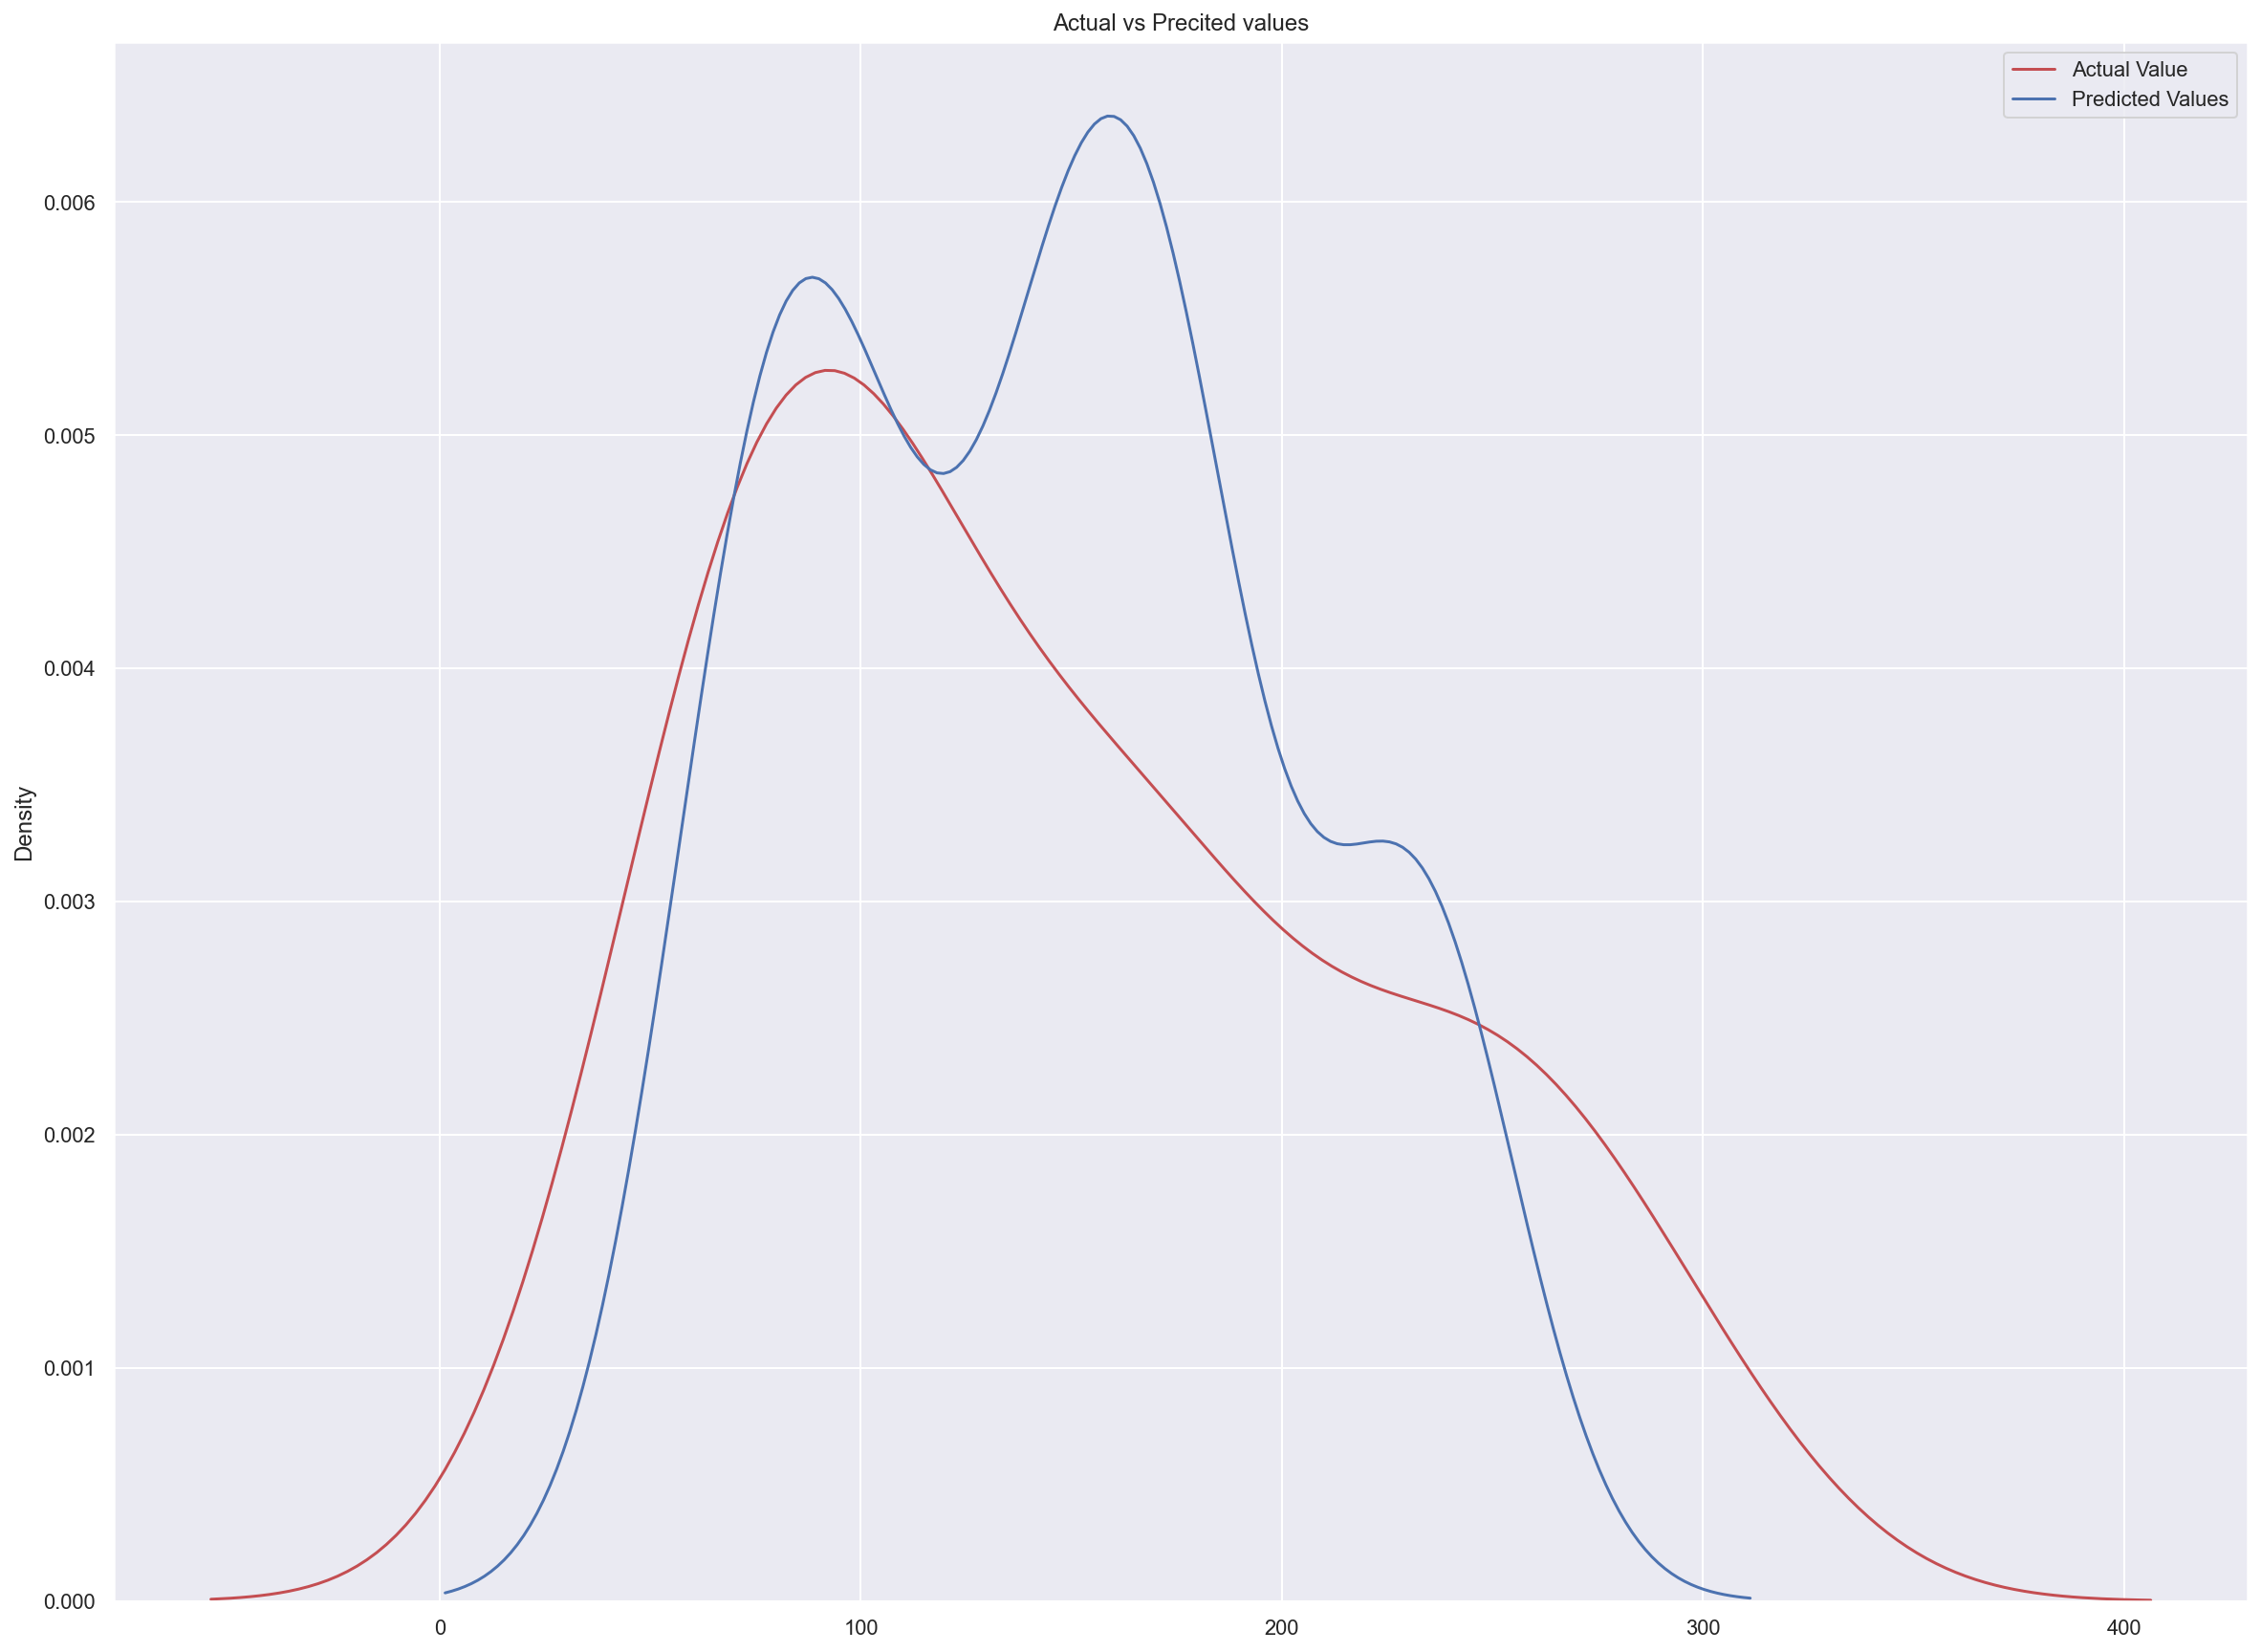

In [23]:
#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_pred, color="b", label="Predicted Values", ax=ax) #predicted values
#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend();

### Polynomial Regression

Let's try with a different model, this time with a polynomial regression.

In [24]:
#creating the 3rd degree polinomial
poly = PolynomialFeatures(degree=3, include_bias=False)
#transforming the values in all X
X_train_poly, X_test_poly = poly.fit_transform(X_train), poly.transform(X_test)

In [25]:
#creating the polynomial regression
poly_reg = LinearRegression()

poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [26]:
y_pred = poly_reg.predict(X_test_poly)

In [27]:
print(f"1) The model explains {np.round(explained_variance_score(y_test,y_pred)*100,2)}% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mean_absolute_error(y_test,y_pred ),2))
print("3) The R-Square score of the model is " , np.round(r2_score(y_test,y_pred),2))

1) The model explains -909.29% variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 151.47
3) The R-Square score of the model is  -9.28


The coefficient of determination on train set, for this model, is much better than the linear regression model. But, the coefficient of determination on test set drops on value (with respect of the one on test set) which leds think to an obvious situation happened here: _overfitting_ (on test set)!

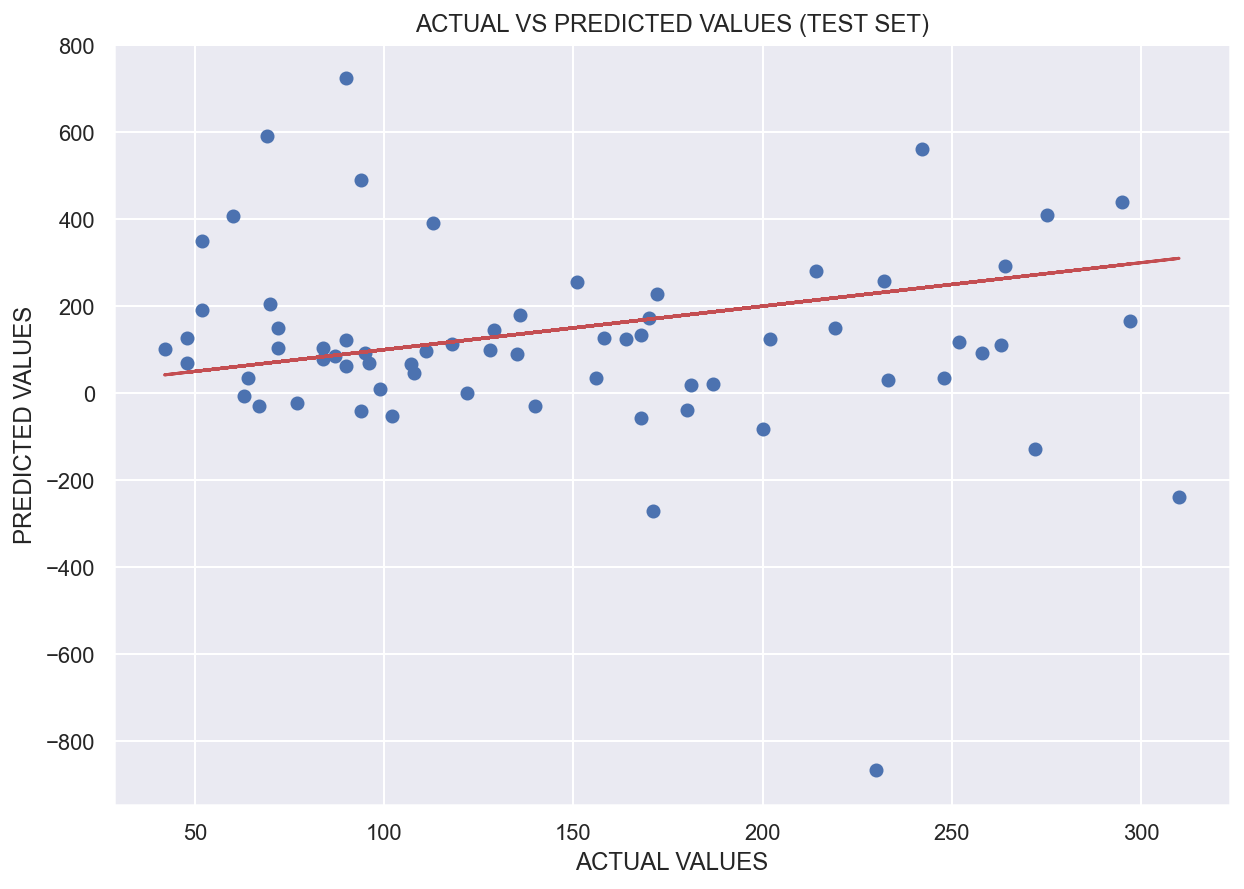

In [28]:
#image dimensions
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES');

Look how data is distributed around the linem however, the model is not very good because of the outliers.

Let's look at the density plot.

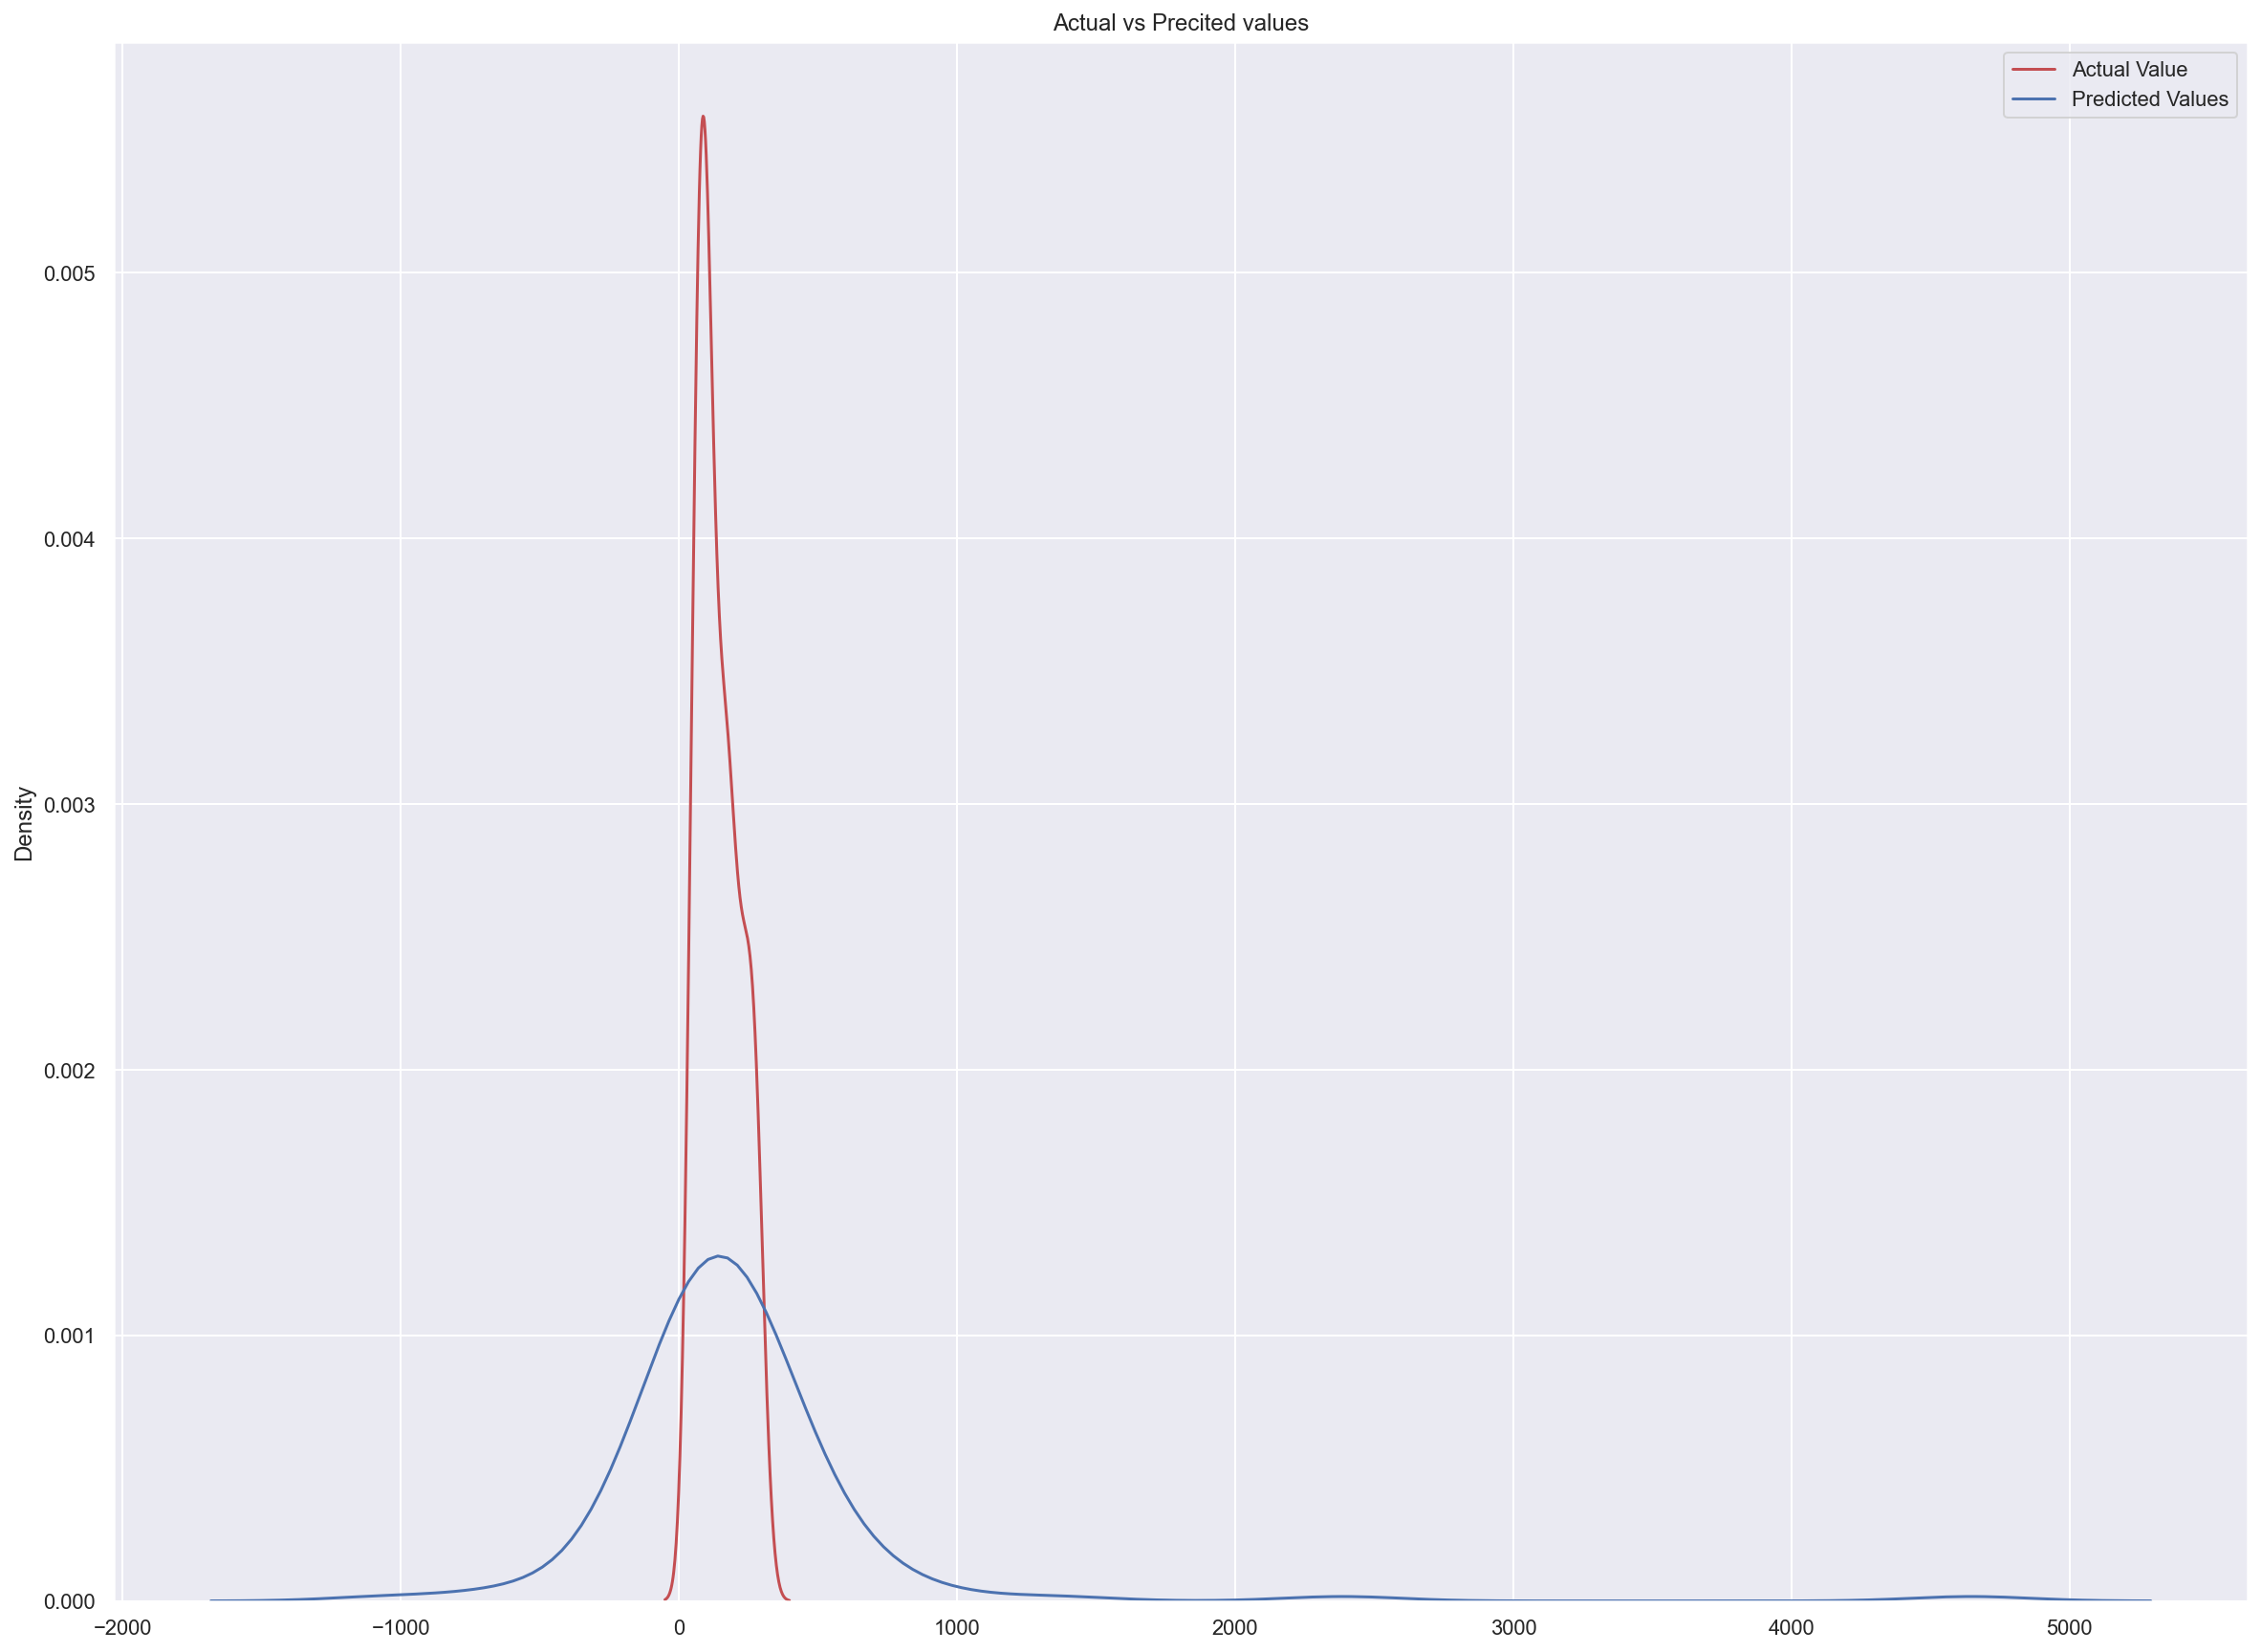

In [26]:
#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_pred, color="b", label="Predicted Values", ax=ax) #predicted values
#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend();

The KDE confirms that the polynomial regression is indeed not a good model to use here. Also, due to overfitting this is the worst model seen for now.

### Huber Regression

Since the polynomial regression is not a good model, let's try with a different model, this time with a Huber regression, less sensible to outliers.

In [30]:
hr = HuberRegressor(max_iter=1000, warm_start=True)
hr.fit(X_train_poly, y_train)

HuberRegressor(max_iter=1000, warm_start=True)

In [31]:
y_pred = hr.predict(X_test_poly)

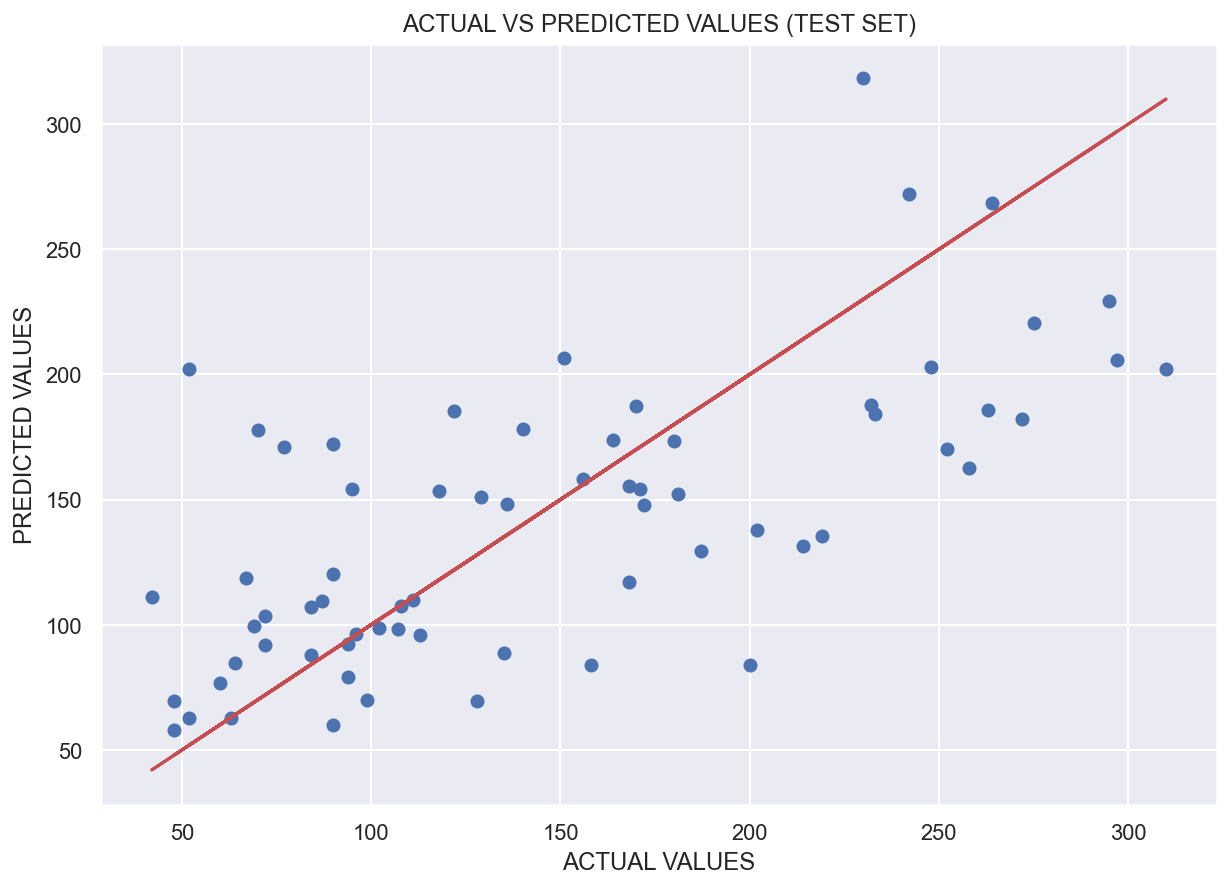

In [33]:
#image dimensions
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES');

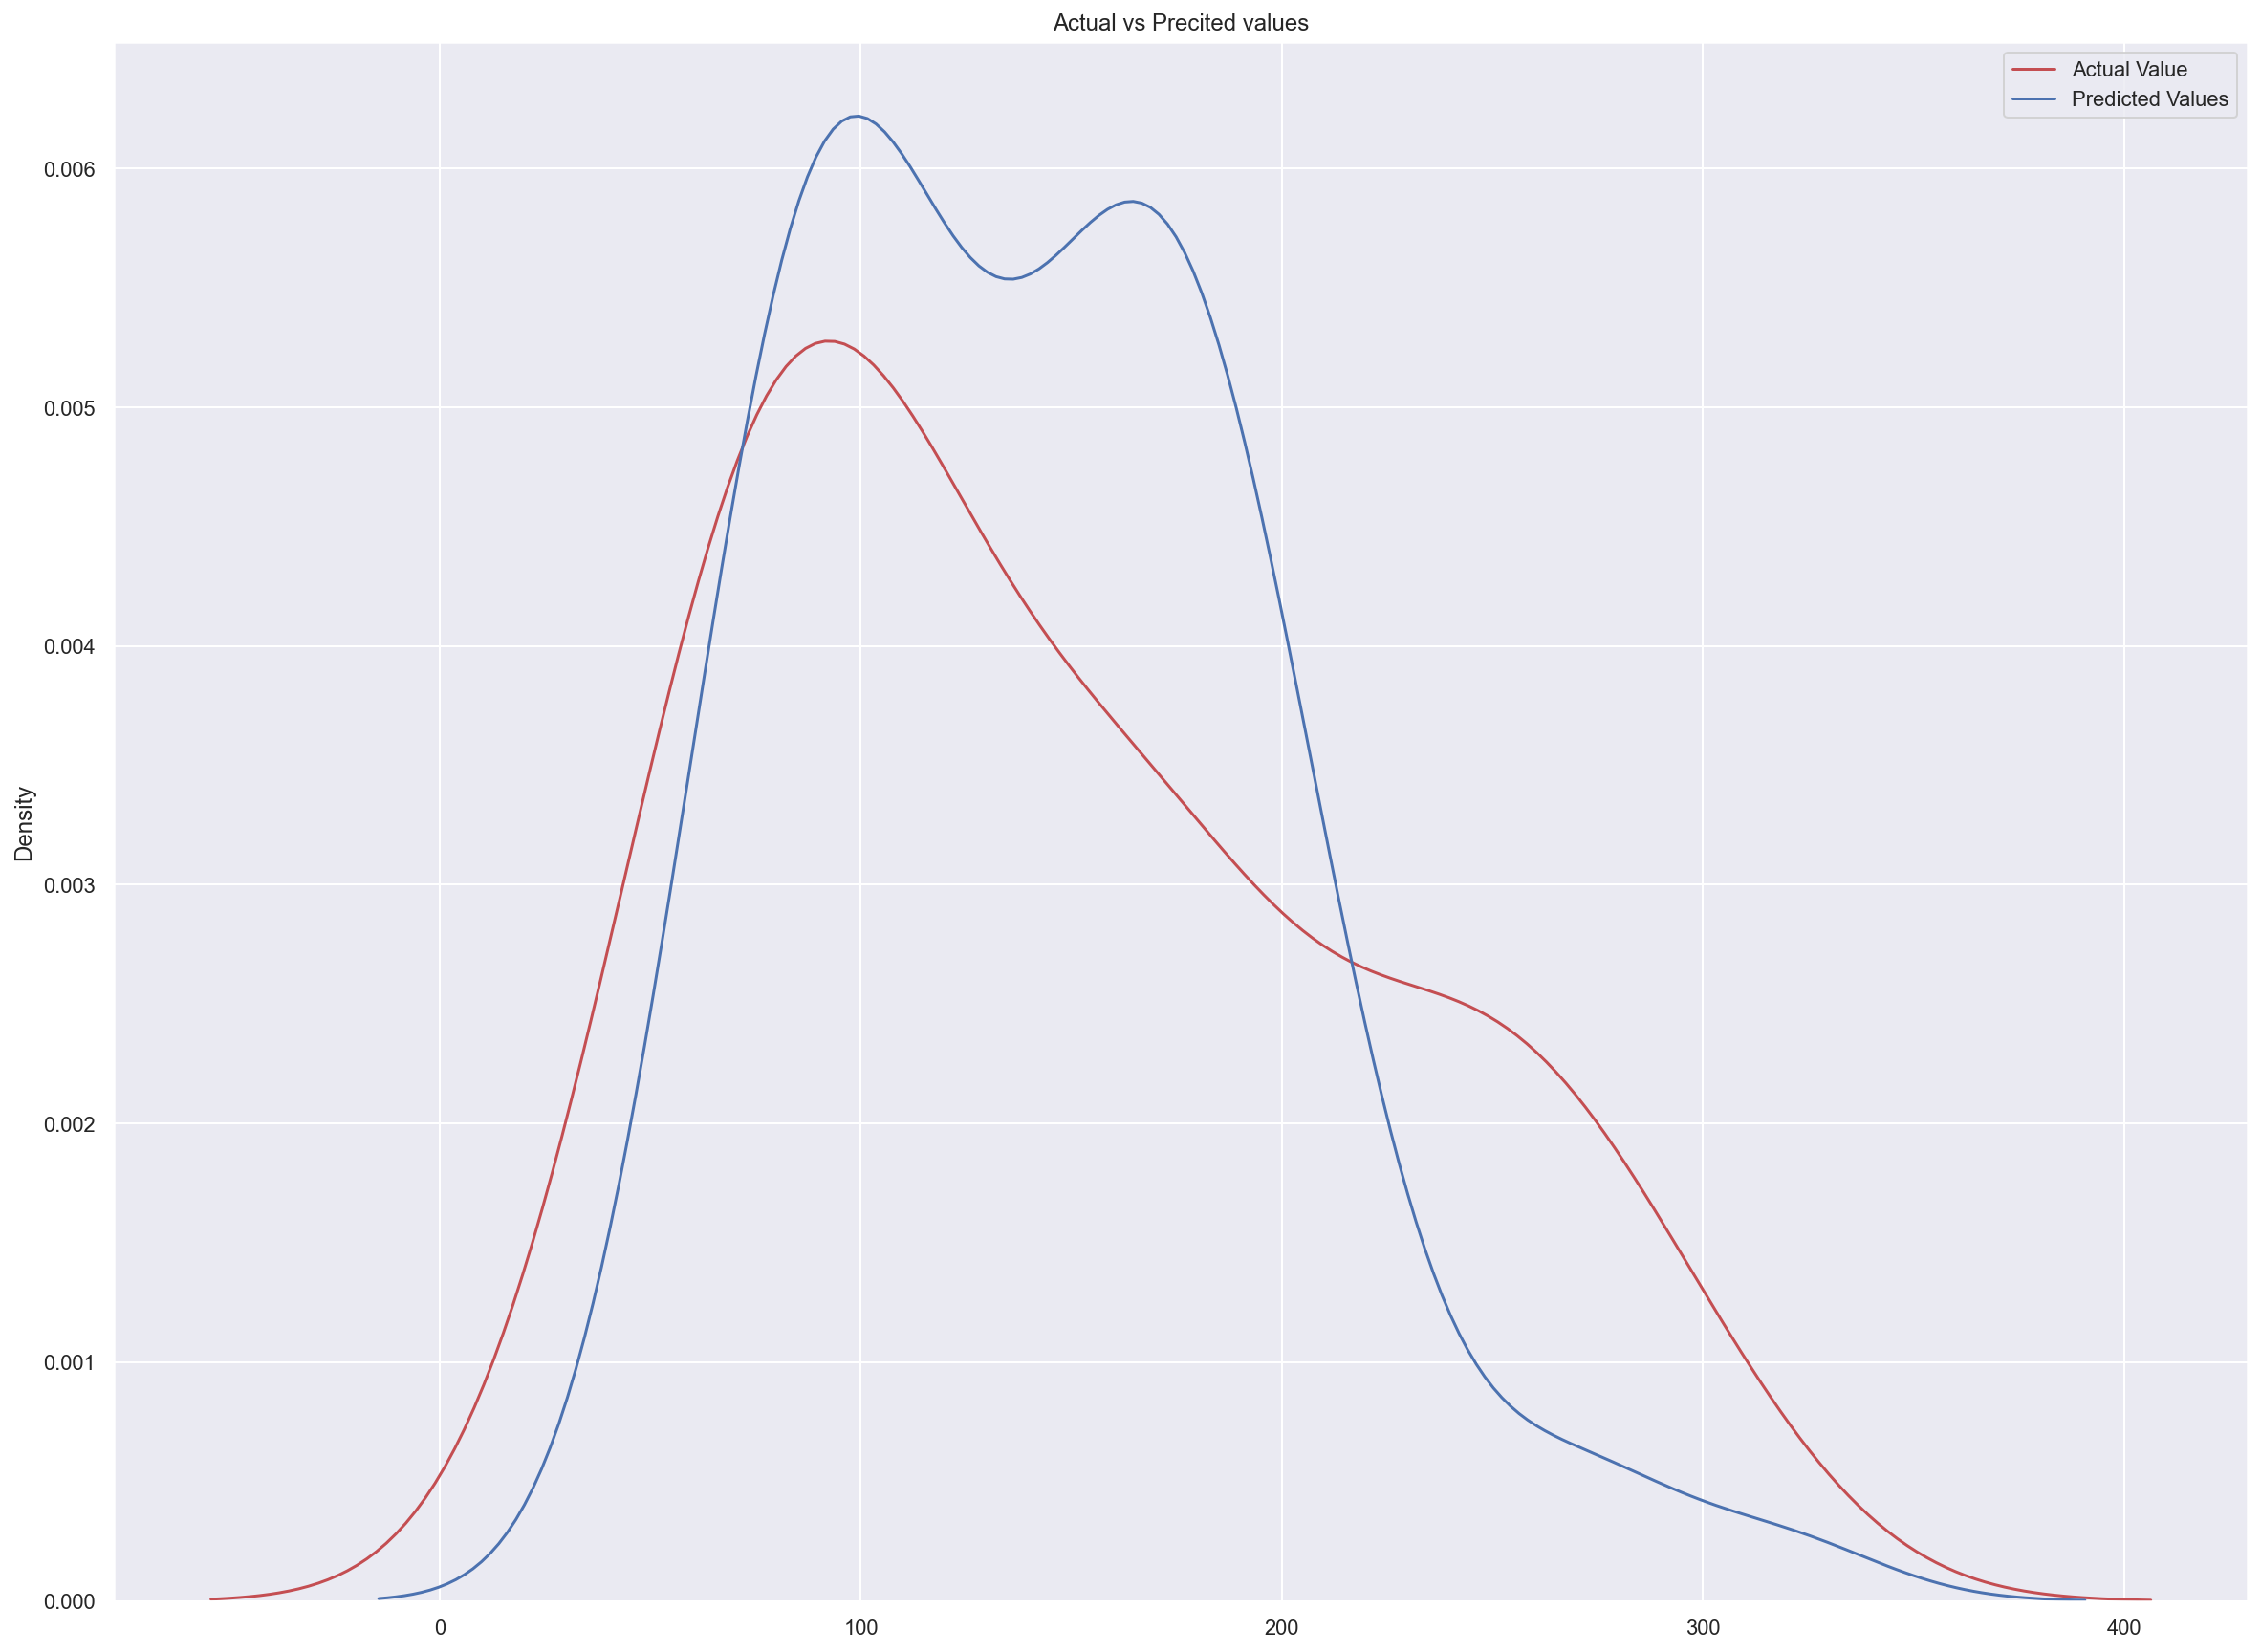

In [32]:
# Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_pred, color="b", label="Predicted Values", ax=ax) #predicted values
#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend();

Not very good, but not too bad.

---

## Modelling with reduced features

Now we want to use the reduced features to build a model.

In [34]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train_drop, y_train)

LinearRegression()

In [35]:
# Predict on the test set
y_pred = lr.predict(X_test_drop)

In [36]:
print(f"1) The model explains {np.round(explained_variance_score(y_test,y_pred)*100,2)}% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mean_absolute_error(y_test,y_pred ),2))
print("3) The R-Square score of the model is " , np.round(r2_score(y_test,y_pred),2))

1) The model explains 42.79% variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 44.48
3) The R-Square score of the model is  0.43


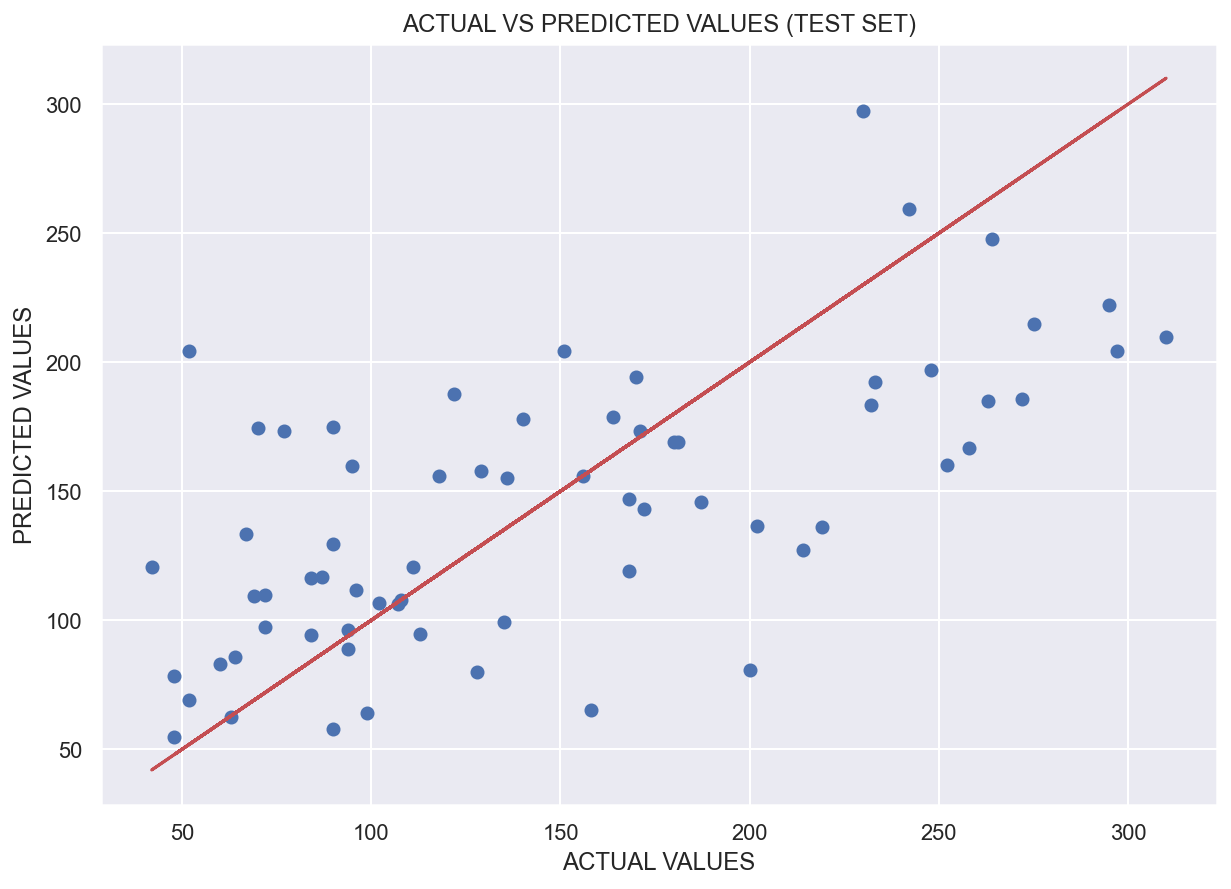

In [37]:
#image dimensions
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES');

As can be seen from the graph above, there is no clear tendency for the spots to be distributed around a line, confirming the fact that linear regression is not a good model.

Anyway, we also want to show a graph of the Kernel Density Estimation, which helps us visualize the probability density of a random variable, between real values ​​and those predicted by the linear mode.

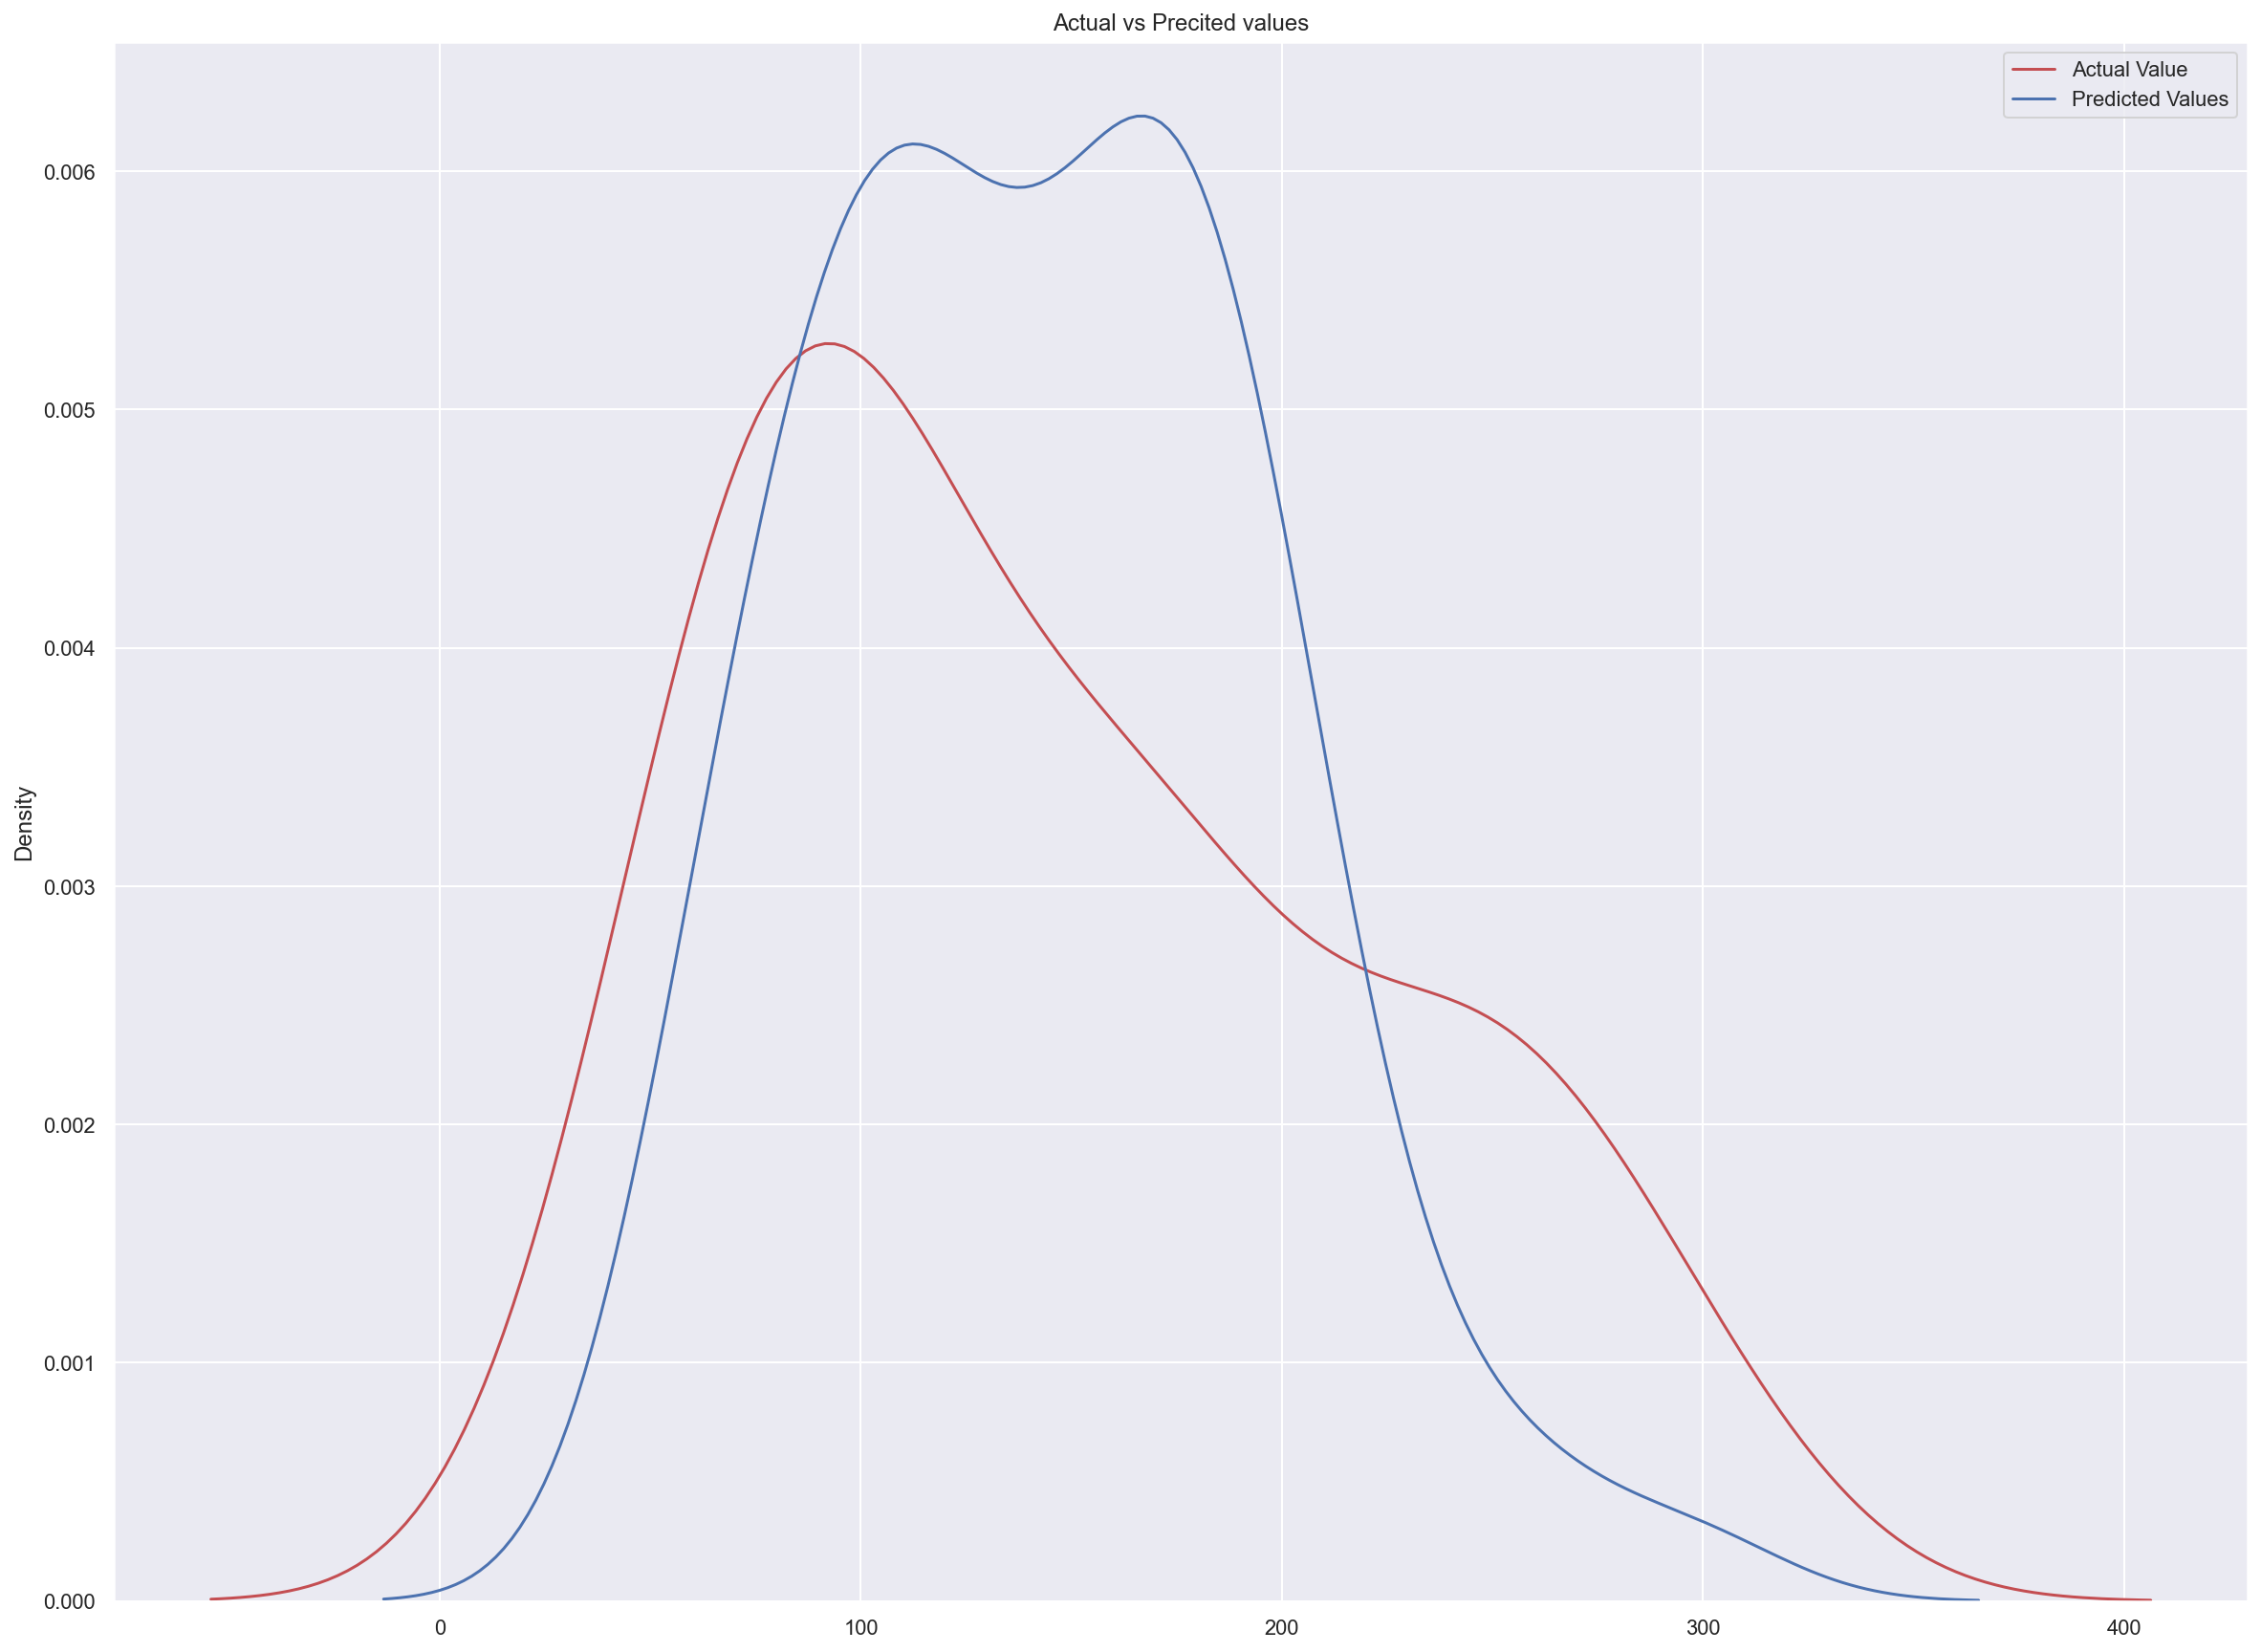

In [38]:
#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_pred, color="b", label="Predicted Values", ax=ax) #predicted values
#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend();

### Decision Tree model

Let's try with a different model.

In [39]:
# Decision tree regressor
dt = DecisionTreeRegressor(max_depth=3, 
                            random_state=42, 
                            min_samples_leaf=5, 
                            min_samples_split=5,
                            criterion="absolute_error",
                            max_features="auto")
dt.fit(X_train_drop, y_train)

/Users/oscardefelice/miniconda3/envs/lectures/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      max_features='auto', min_samples_leaf=5,
                      min_samples_split=5, random_state=42)

In [40]:
# Predict on the test set
y_pred = dt.predict(X_test_drop)

In [41]:
print(f"1) The model explains {np.round(explained_variance_score(y_test,y_pred)*100,2)}% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mean_absolute_error(y_test,y_pred ),2))
print("3) The R-Square score of the model is " , np.round(r2_score(y_test,y_pred),2))

1) The model explains 36.97% variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 46.87
3) The R-Square score of the model is  0.37


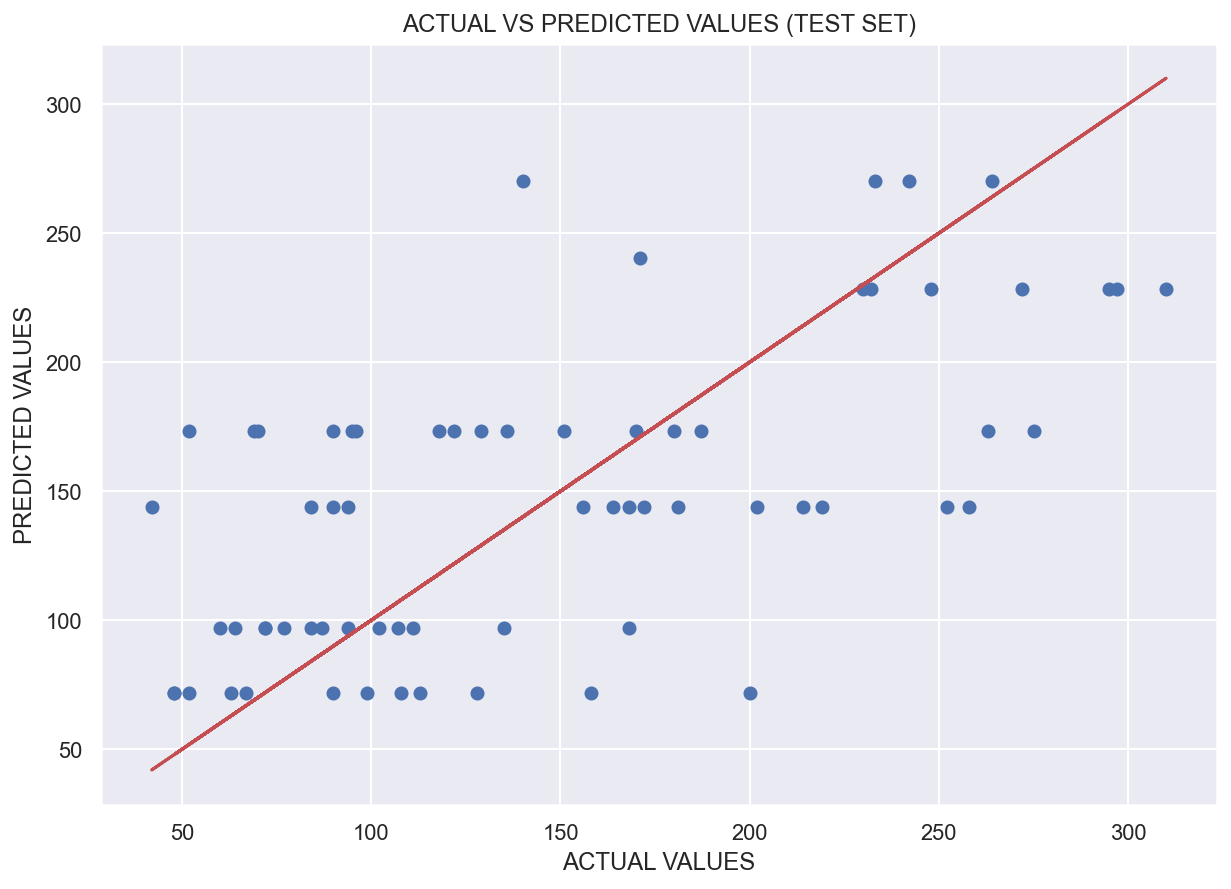

In [42]:
#image dimensions
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES');

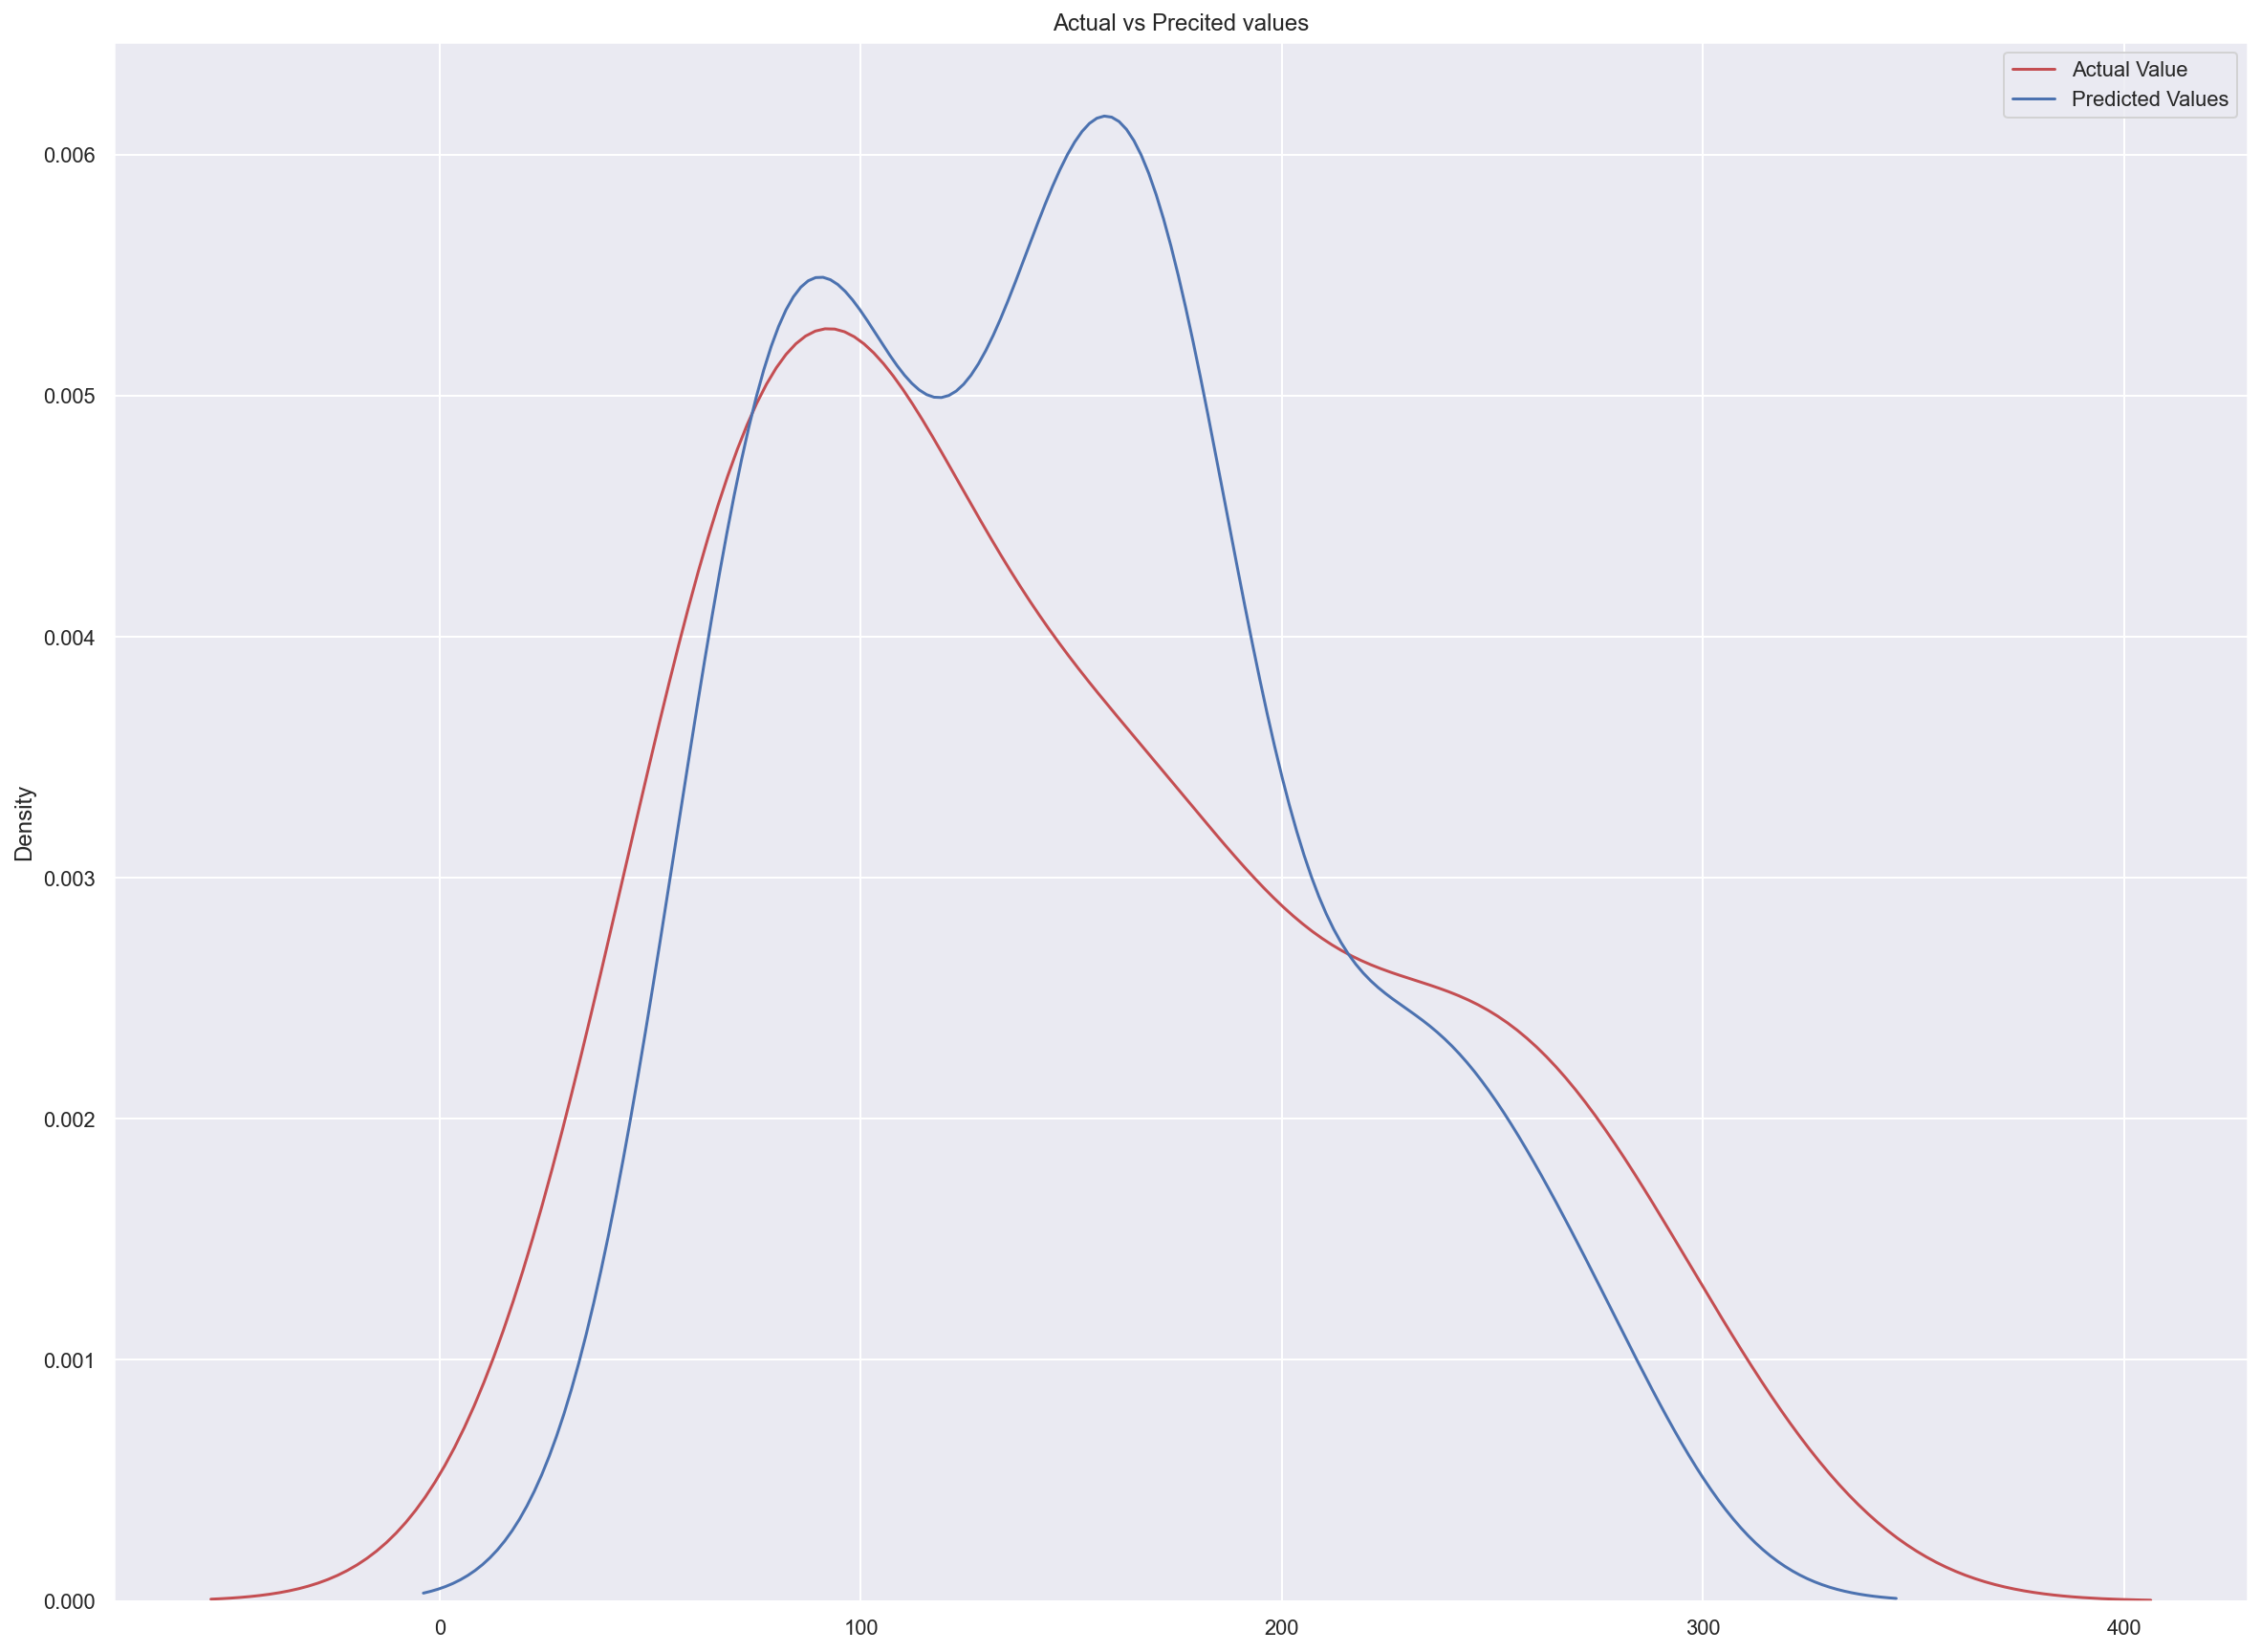

In [43]:
#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_pred, color="b", label="Predicted Values", ax=ax) #predicted values
#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend();

### Polynomial Regression

Let's try with a different model, this time with a polynomial regression.

In [54]:
#creating the 3rd degree polinomial
poly = PolynomialFeatures(degree=2, include_bias=False)
#transforming the values in all X
X_train_poly, X_test_poly = poly.fit_transform(X_train_drop), poly.transform(X_test_drop)

In [55]:
#creating the polynomial regression
poly_reg = LinearRegression()

poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [56]:
y_pred = poly_reg.predict(X_test_poly)

In [57]:
print(f"1) The model explains {np.round(explained_variance_score(y_test,y_pred)*100,2)}% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mean_absolute_error(y_test,y_pred ),2))
print("3) The R-Square score of the model is " , np.round(r2_score(y_test,y_pred),2))

1) The model explains 47.52% variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 41.12
3) The R-Square score of the model is  0.47


The coefficient of determination on train set, for this model, is much better than the linear regression model. But, the coefficient of determination on test set drops on value (with respect of the one on test set) which leds think to an obvious situation happened here: _overfitting_ (on test set)!

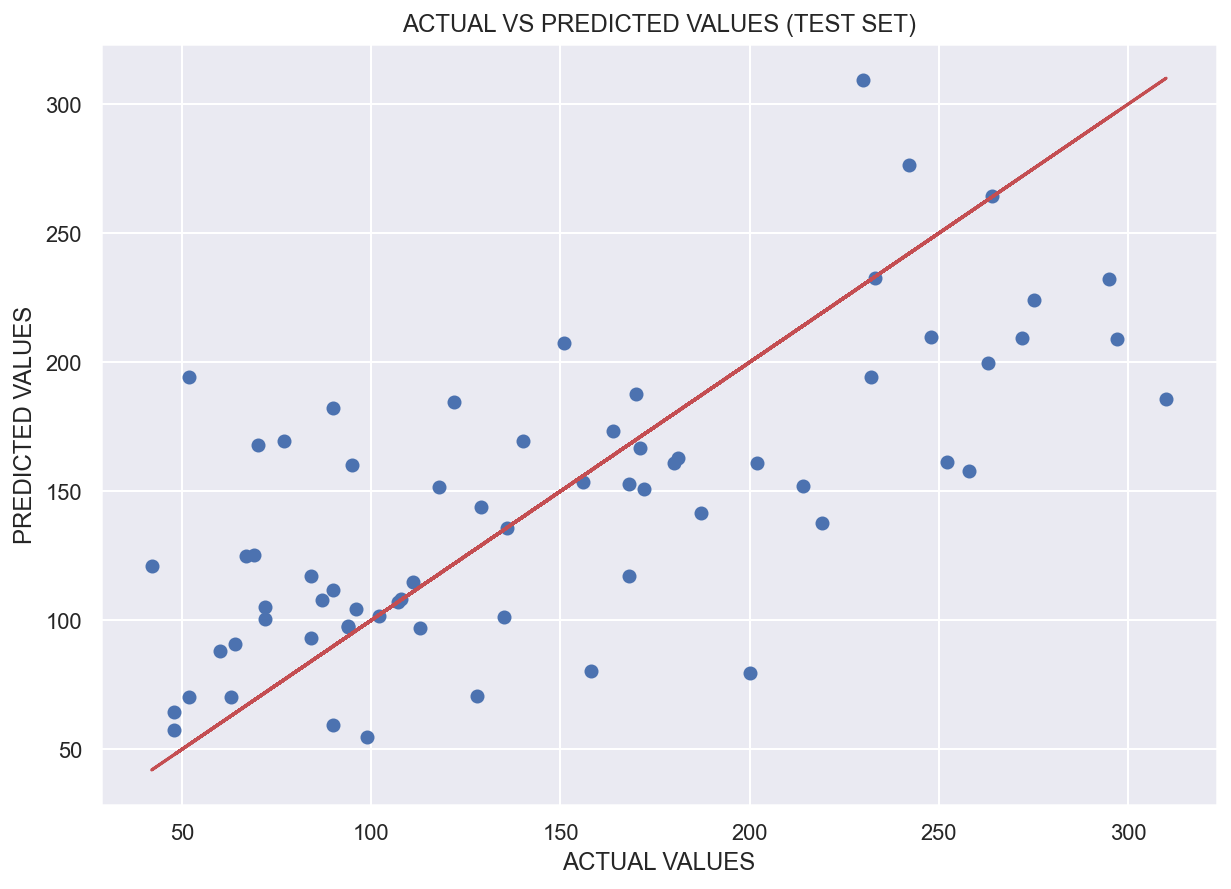

In [58]:
#image dimensions
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES');

Look how data is distributed around the linem however, the model is not very good because of the outliers.

Let's look at the density plot.

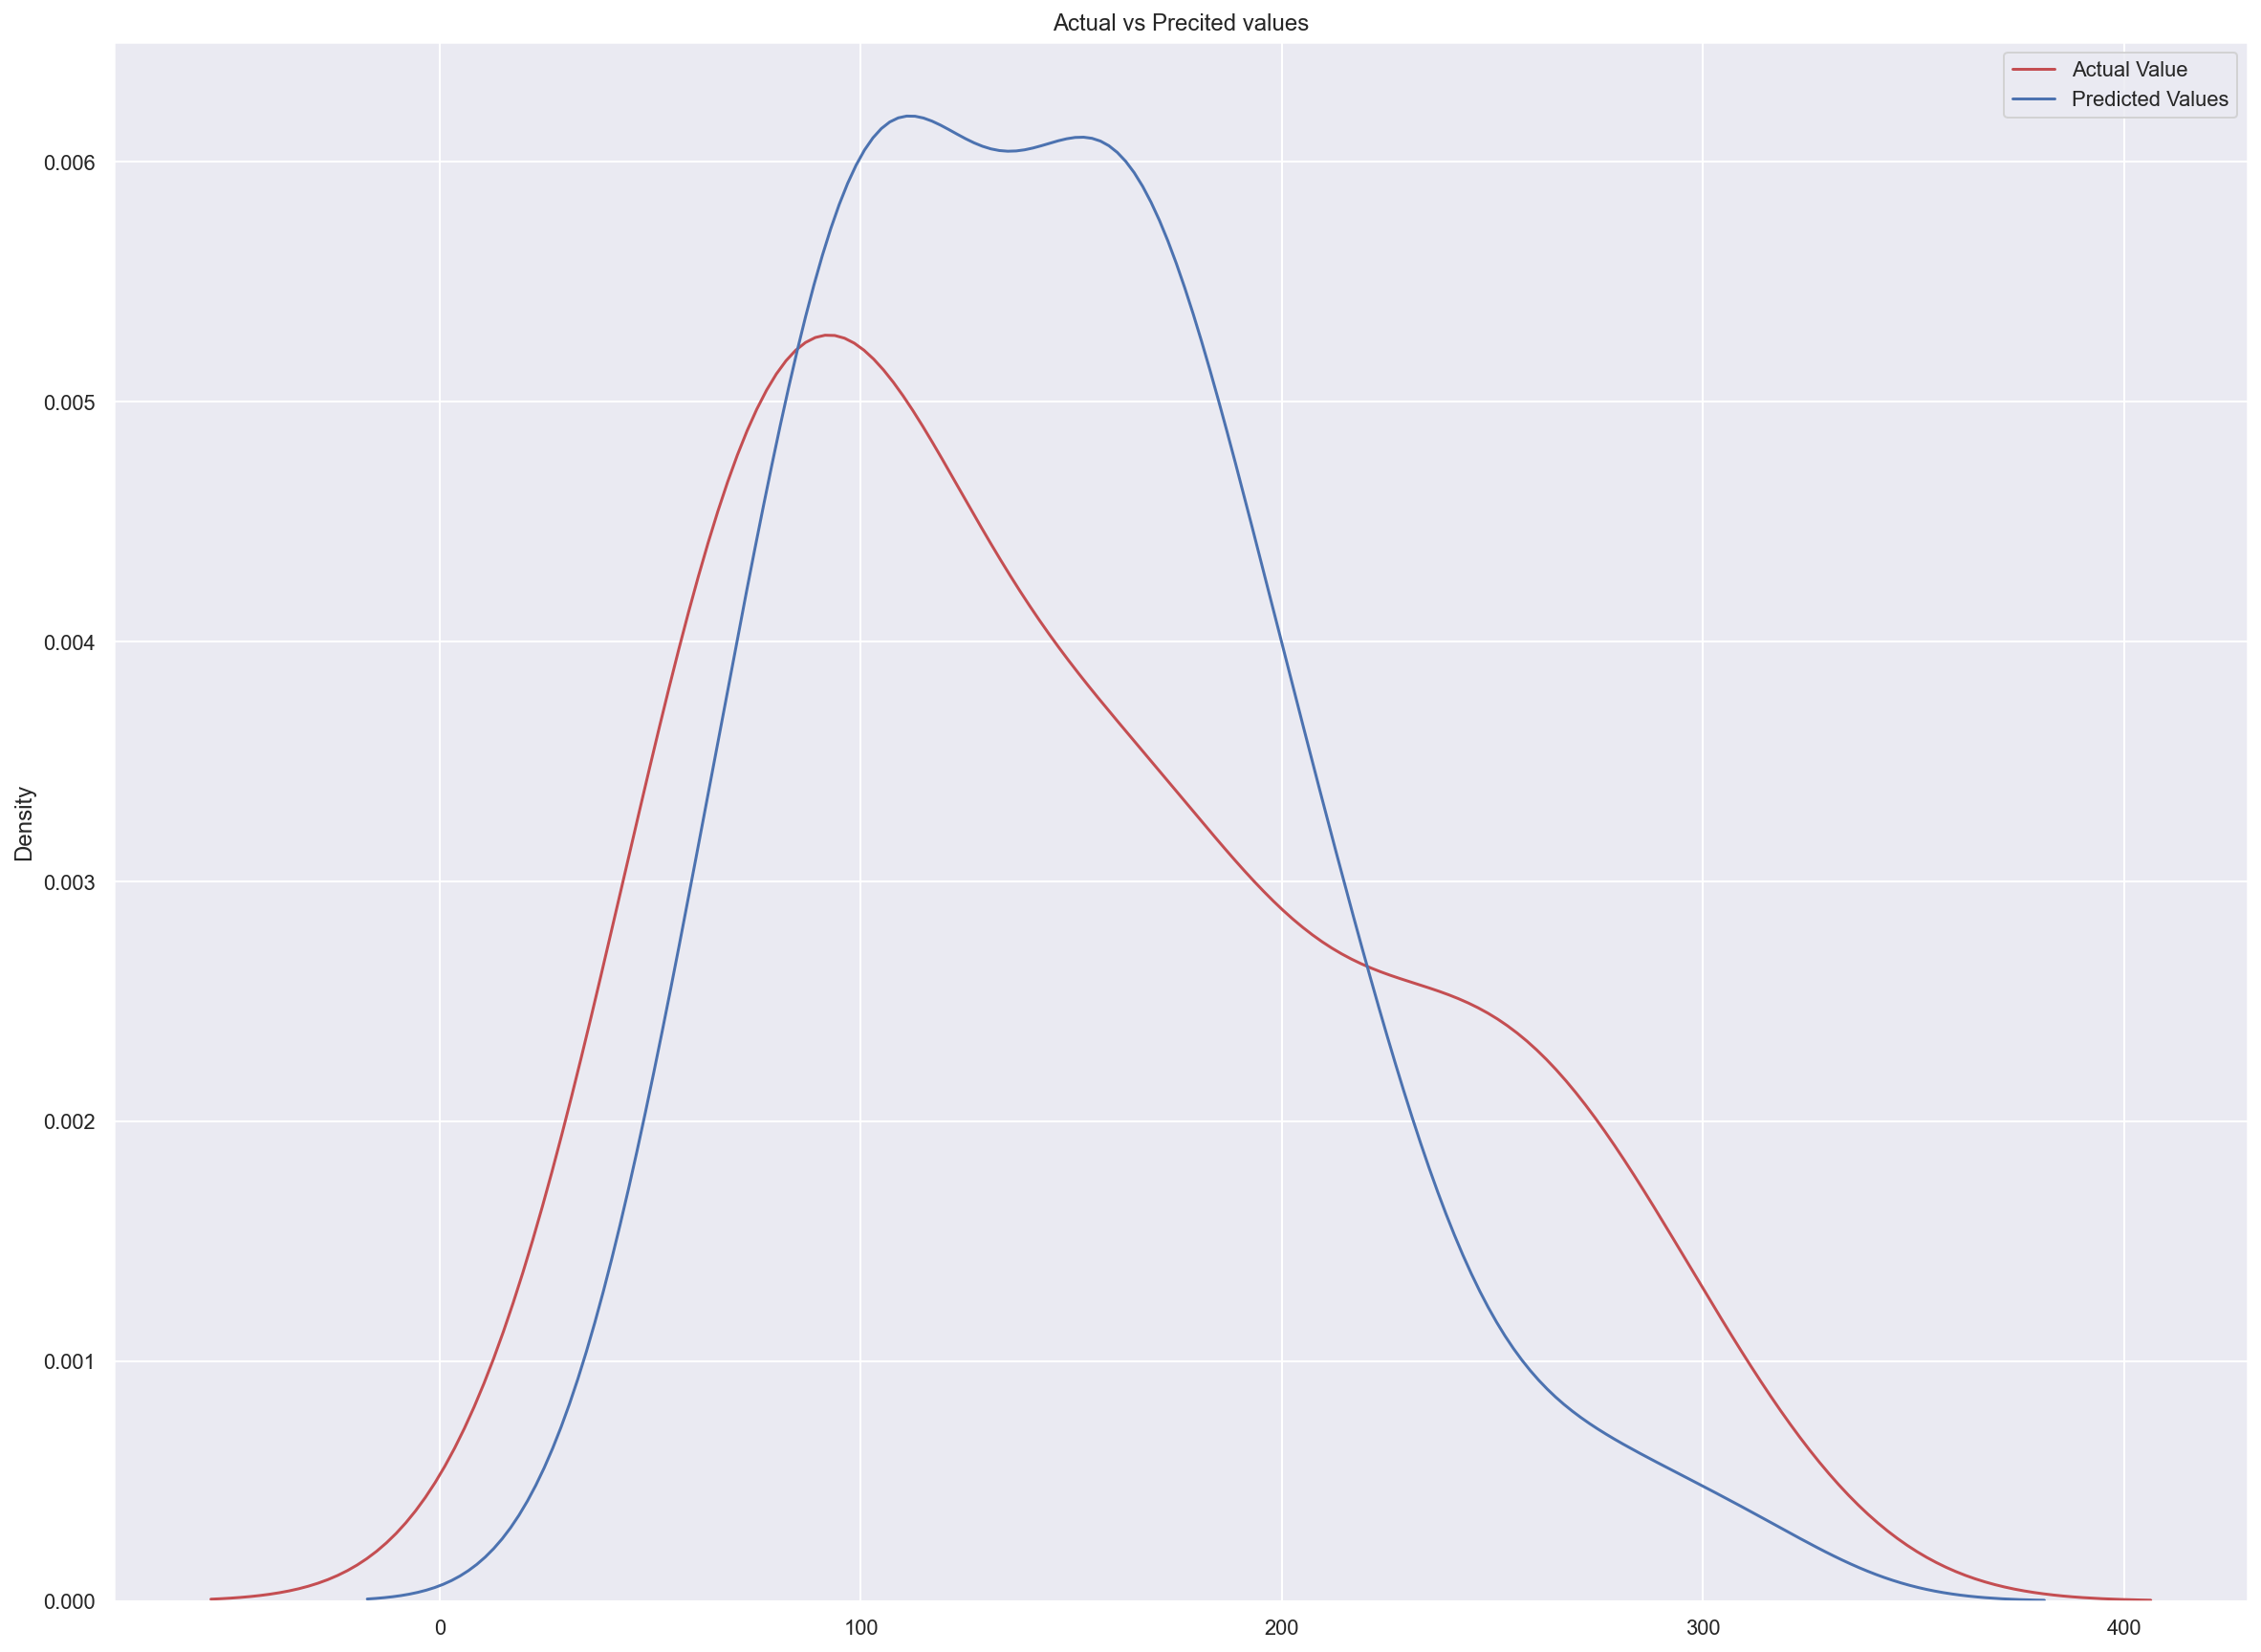

In [59]:
#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_pred, color="b", label="Predicted Values", ax=ax) #predicted values
#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend();

The KDE confirms that the polynomial regression is indeed not a good model to use here. Also, due to overfitting this is the worst model seen for now.

### Huber Regression

Since the polynomial regression is not a good model, let's try with a different model, this time with a Huber regression, less sensible to outliers.

In [60]:
hr = HuberRegressor(max_iter=1000, warm_start=True)
hr.fit(X_train_poly, y_train)

HuberRegressor(max_iter=1000, warm_start=True)

In [61]:
y_pred = hr.predict(X_test_poly)

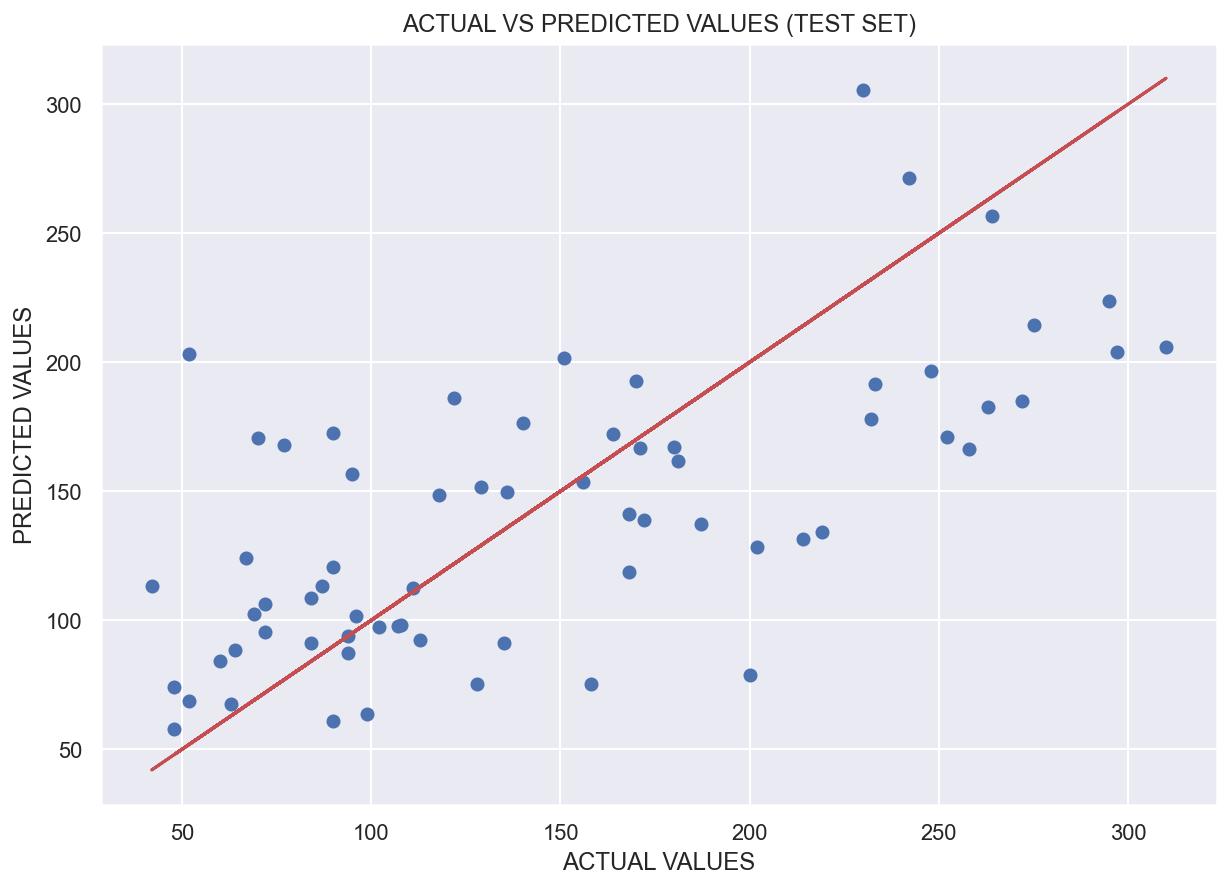

In [62]:
#image dimensions
plt.figure(figsize=(10, 7))
#scatterplot of y_test and y_test_pred
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
#labeling
plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES');

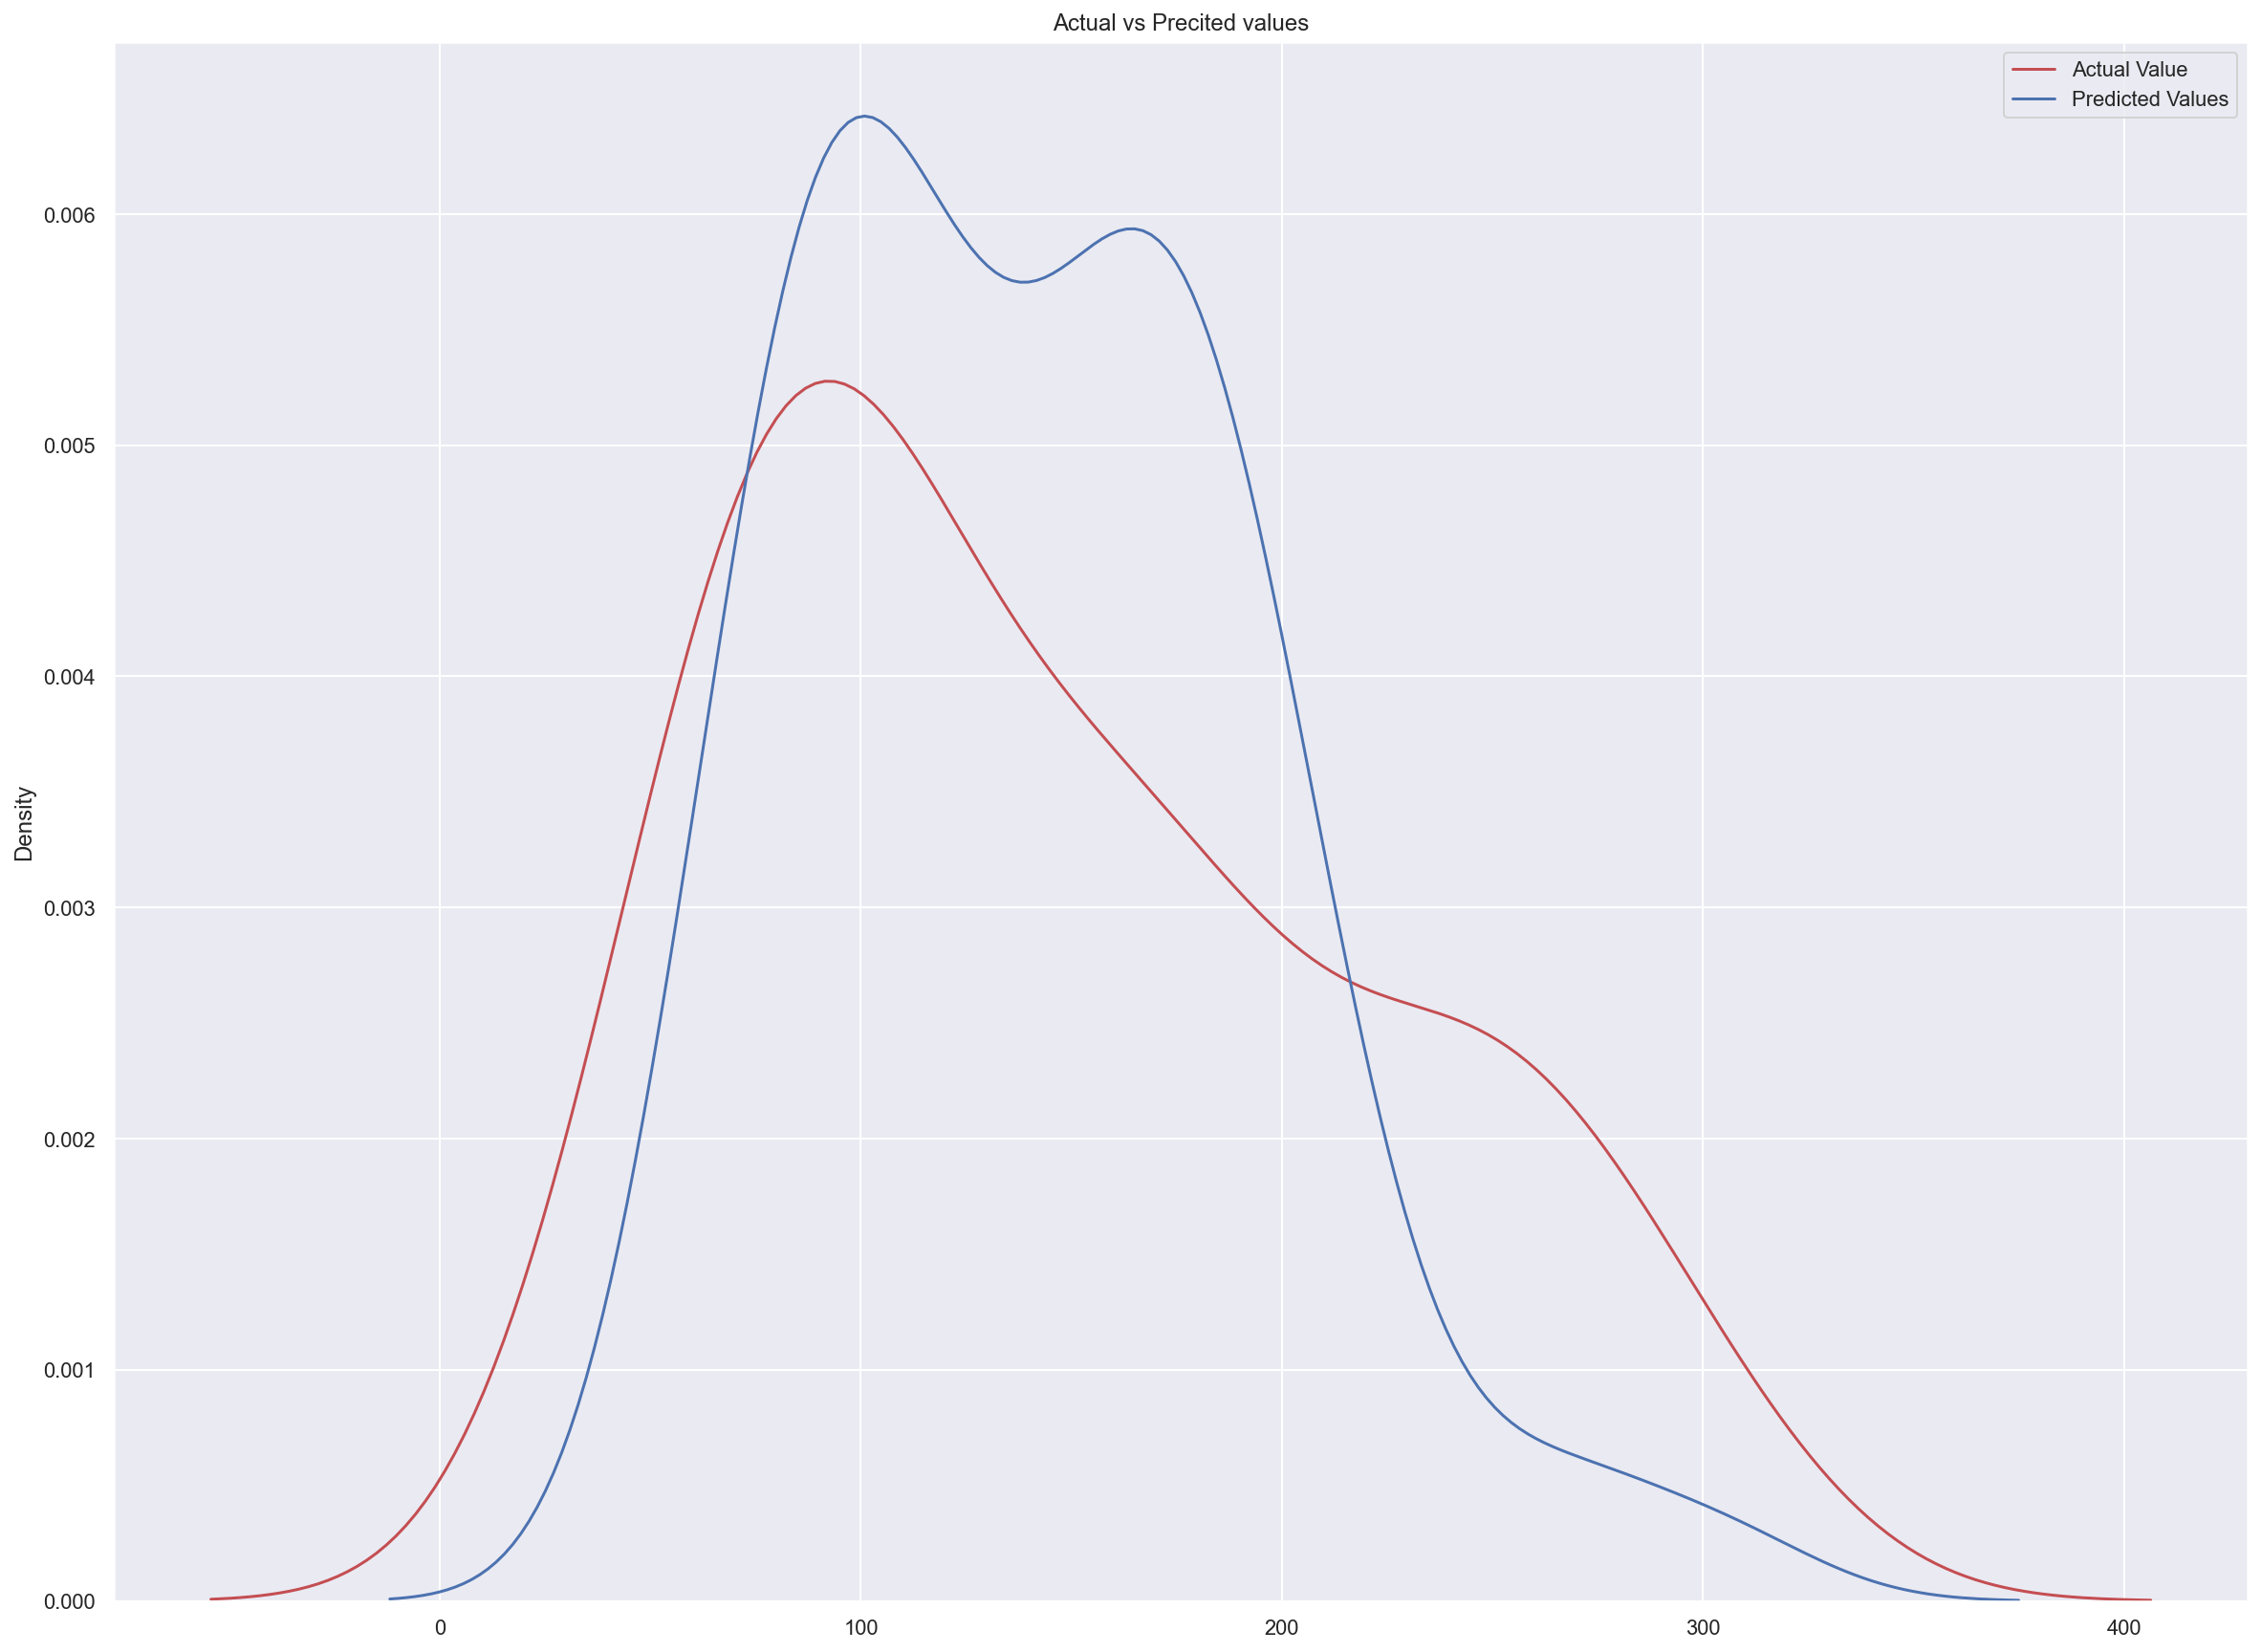

In [63]:
# Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_pred, color="b", label="Predicted Values", ax=ax) #predicted values
#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend();

Not a good model, the task was dfficult =) but the last one is the best one.